# Reconstruction of CBC signals with WDF

In [1]:
import pandas as pd


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import h5py
import matplotlib
import pylab

matplotlib.rcParams['agg.path.chunksize'] = 10000 # Otherwise Overflow plotting too many points
enable_interactive = True
if enable_interactive==True:
    %matplotlib notebook

In [3]:
path = '/data/dev/ml/cwb_vs_wdf/data/cbc_uniformSNR/splitted/cbc_'
path = '/data/dev/ml/cwb_vs_wdf/data/cbc_uniformSNR_v2/splitted/cbc_'
csv_name = 'WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR2.csv'

In [24]:
ls -l /data/dev/ml/cwb_vs_wdf/data/no_dct/cbc/cbc_uniformedSNR_v2.h5

-rw-r--r-- 1 morawski pl 5945849689 Feb  1  2021 /data/dev/ml/cwb_vs_wdf/data/no_dct/cbc/cbc_uniformedSNR_v2.h5


In [4]:
path_for_plots ='/users/iess/WDF_vs_cWB/plots/'

In [5]:
wdf_threshold = 3
no_dct=True
noise = True
if no_dct==True:
    if noise==False:
        path = '/data/dev/ml/cwb_vs_wdf/data/no_dct/cbc/splitted_cbc_cbc_uniformedSNR_v2/'
        white_file = 'cbc_uniformedSNR_v2_white.h5'
    else:
        path = '/data/dev/ml/cwb_vs_wdf/data/no_dct/noise/splitted_noise_noise/'
        white_file = 'noise_white.h5'
    csv_name = 'WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR3.csv' 

In [6]:
ls -lt /data/dev/ml/cwb_vs_wdf/data/no_dct/cbc/splitted_cbc_cbc_uniformedSNR_v2/part_0

total 14584
drwxr-xr-x 2 morawski pl      195 Feb  1  2021 wp/
-rw-r--r-- 1 morawski pl  4735014 Feb  1  2021 cbc_uniformedSNR_v2_white.h5
-rw-r--r-- 1 morawski pl 10192896 Feb  1  2021 cbc_uniformedSNR_v2.h5


In [8]:
list_seg_folders = glob.glob(path+'*')

In [9]:
seg_ex = list_seg_folders[0]+'/'

In [10]:
ls $seg_ex

noise.h5  noise_white.h5  wp/


In [11]:
list_of_process_trig = glob.glob(path+'part_*/wp/WDFT*')

In [12]:
ls $path

part_0/    part_13/   part_161/  part_193/  part_224/  part_4/   part_71/
part_1/    part_130/  part_162/  part_194/  part_225/  part_40/  part_72/
part_10/   part_131/  part_163/  part_195/  part_226/  part_41/  part_73/
part_100/  part_132/  part_164/  part_196/  part_227/  part_42/  part_74/
part_101/  part_133/  part_165/  part_197/  part_228/  part_43/  part_75/
part_102/  part_134/  part_166/  part_198/  part_229/  part_44/  part_76/
part_103/  part_135/  part_167/  part_199/  part_23/   part_45/  part_77/
part_104/  part_136/  part_168/  part_2/    part_230/  part_46/  part_78/
part_105/  part_137/  part_169/  part_20/   part_231/  part_47/  part_79/
part_106/  part_138/  part_17/   part_200/  part_232/  part_48/  part_8/
part_107/  part_139/  part_170/  part_201/  part_233/  part_49/  part_80/
part_108/  part_14/   part_171/  part_202/  part_234/  part_5/   part_81/
part_109/  part_140/  part_172/  part_203/  part_235/  part_50/  part_82/
part_11/   part_141/  part_173/  part_2

In [14]:
with h5py.File(seg_ex+white_file, 'r') as f:
    print(list(f.keys()))
    h = np.array(f['strain_white'])
    
with h5py.File(list_seg_folders[1]+'/'+white_file, 'r') as f:
    print(list(f.keys()))
    h1 = np.array(f['strain_white'])
    
# with h5py.File(path+'/'+white_file, 'r') as f:
#     print(list(f.keys()))
#     h1 = np.array(f['strain_white'])

['strain_white']
['strain_white']


<IPython.core.display.Javascript object>


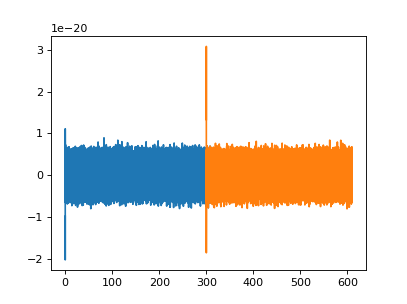

In [16]:
fs = 4096
h_detail_start, h_detail_end = 0, 4000
h_detail = h[h_detail_start*fs:h_detail_end*fs]
h1_detail =  h1[h_detail_start*fs:h_detail_end*fs]

plt.figure(), plt.plot(np.arange(0,len(h_detail)/fs, 1/fs), h_detail)
plt.plot(300+np.arange(0,len(h_detail)/fs, 1/fs), h1_detail)

<IPython.core.display.Javascript object>


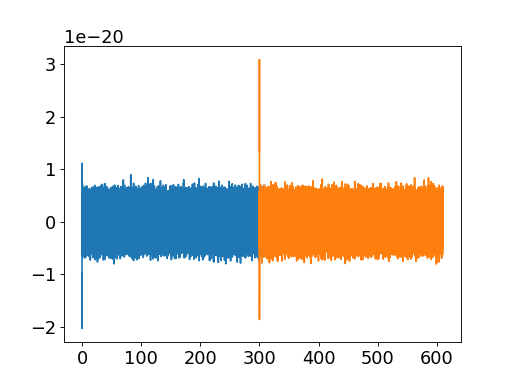

In [360]:
plt.figure(), plt.plot(np.arange(0,len(h_detail)/fs, 1/fs), h_detail)
plt.plot(300+np.arange(0,len(h_detail)/fs, 1/fs), h1_detail)

In [361]:
df_total = pd.DataFrame()
df_reduced = pd.DataFrame()

In [362]:
list_of_process_trig

['/data/dev/ml/cwb_vs_wdf/data/no_dct/noise/splitted_noise_noise/part_0/wp/WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR3.csv',
 '/data/dev/ml/cwb_vs_wdf/data/no_dct/noise/splitted_noise_noise/part_1/wp/WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR3.csv',
 '/data/dev/ml/cwb_vs_wdf/data/no_dct/noise/splitted_noise_noise/part_3/wp/WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR3.csv',
 '/data/dev/ml/cwb_vs_wdf/data/no_dct/noise/splitted_noise_noise/part_5/wp/WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR3.csv',
 '/data/dev/ml/cwb_vs_wdf/data/no_dct/noise/splitted_noise_noise/part_6/wp/WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR3.csv',
 '/data/dev/ml/cwb_vs_wdf/data/no_dct/noise/splitted_noise_noise/part_7/wp/WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR3.csv',
 '/data/dev/ml/cwb_vs_wdf/data/no_dct/noise/splitted_noise_noise/part_8/wp/WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR3.csv',
 '/data/dev/ml/cwb_vs_wdf/data/no_dct/noise/splitted_noise_noise/part_9/wp/WDFTrigger-strain-GPS0-AR4000

In [363]:
df = pd.read_csv(list_of_process_trig[4])

In [364]:
ls /data/dev/ml/cwb_vs_wdf/data/no_dct/cbc/splitted_cbc_cbc_uniformedSNR_v2/part_6/wp/

ARcoeff-AR4000-fs4096-strain.txt
fileParametersUsed.json
LVcoeff-AR4000-fs4096-strain.txt
WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR3.csv


In [324]:
df

gps        snr     snrMax        freq  freqMax  duration  \
0  72000.000000  11.645739  34.906298   92.000000     96.0  0.002197   
1  72176.000000   3.323460  30.065366   58.666667    164.0  0.115479   
2  72203.499023   3.080082  30.948164  149.333333    208.0  0.124268   

          wave  wt0           wt1  wt2  ...        rw1014        rw1015  \
0  BsplineC309  0.0  0.000000e+00  0.0  ...  8.318501e-22  8.020736e-22   
1  BsplineC309  0.0  1.168360e-20  0.0  ... -1.466891e-23 -1.329840e-23   
2  BsplineC309  0.0  0.000000e+00  0.0  ... -3.730581e-23 -4.056655e-23   

         rw1016        rw1017        rw1018        rw1019        rw1020  \
0  7.637463e-22  7.168685e-22  5.535716e-22  2.738556e-22 -1.222793e-22   
1 -1.192232e-23 -1.054067e-23 -9.153443e-24 -7.760649e-24 -6.362284e-24   
2 -4.402376e-23 -4.767744e-23 -5.152759e-23 -5.557421e-23 -5.981729e-23   

         rw1021        rw1022        rw1023  
0 -6.348334e-22 -1.685203e-21 -3.273388e-21  
1 -4.958347e-24 -3.548839e-24 -2.133761e-24  
2 -6.425684e-23 -6.889286e-23 -7.372535e-23  

[3 rows x 2055 columns]

In [365]:
#ls /data/dev/ml/cwb_vs_wdf/data/no_dct/noise/splitted_noise_noise/part_238
#ls /data/dev/ml/cwb_vs_wdf/data/no_dct/noise/splitted_noise_noise/part_240


In [366]:
csv_name

'WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR3.csv'

In [367]:
#path_to_file

In [368]:
seconds_per_file = 300    # from old, cross check
N_triggers = 0
N_triggers_red = 0
N_files_processed = 0

for i in range(len(list_seg_folders)):
    path_to_file = path + 'part_'+str(i) + "/wp/"
    if 2>1:
        try:
            df = pd.read_csv(path_to_file + csv_name)
            df_red = df[df['gps']>=10]
            df_red["gps"] = df_red["gps"] + 300 + seconds_per_file*i  
            df["gps"] = df["gps"] + 300 + seconds_per_file*i
            
            df_total = df_total.append(df)
            df_reduced = df_reduced.append(df_red)
            print('Read file ', str(i))
            print('Number of triggers in file: '+ str(df.shape[0]))
            N_triggers += df.shape[0]
            N_triggers_red += df_red.shape[0]
            N_files_processed+=1
        except:
            print('Error: file '+ str(i)+' not found. Skipping to next, adding missing time length.')
            continue

#    df_total.to_csv('./'+trigger_file) 

    else:
        print('.csv trigger file already exists.')
        df_total = pd.read_csv('./'+trigger_file)

/virgoDev/envWDF/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Read file  0
Number of triggers in file: 2
Read file  1
Number of triggers in file: 3
Error: file 2 not found. Skipping to next, adding missing time length.
Read file  3
Number of triggers in file: 2
Error: file 4 not found. Skipping to next, adding missing time length.
Read file  5
Number of triggers in file: 1
Read file  6
Number of triggers in file: 2
Read file  7
Number of triggers in file: 1
Read file  8
Number of triggers in file: 2
Read file  9
Number of triggers in file: 1
Read file  10
Number of triggers in file: 1
Error: file 11 not found. Skipping to next, adding missing time length.
Read file  12
Number of triggers in file: 1
Read file  13
Number of triggers in file: 3
Read file  14
Number of triggers in file: 2
Read file  15
Number of triggers in file: 4
Read file  16
Number of triggers in file: 1
Read file  17
Number of triggers in file: 2
Read file  18
Number of triggers in file: 1
Read file  19
Number of triggers in file: 1
Read file  20
Number of triggers in file: 2
Re

Read file  173
Number of triggers in file: 2
Read file  174
Number of triggers in file: 3
Error: file 175 not found. Skipping to next, adding missing time length.
Read file  176
Number of triggers in file: 2
Read file  177
Number of triggers in file: 3
Error: file 178 not found. Skipping to next, adding missing time length.
Error: file 179 not found. Skipping to next, adding missing time length.
Read file  180
Number of triggers in file: 1
Read file  181
Number of triggers in file: 4
Read file  182
Number of triggers in file: 2
Read file  183
Number of triggers in file: 3
Read file  184
Number of triggers in file: 1
Read file  185
Number of triggers in file: 1
Read file  186
Number of triggers in file: 2
Error: file 187 not found. Skipping to next, adding missing time length.
Read file  188
Number of triggers in file: 4
Read file  189
Number of triggers in file: 2
Read file  190
Number of triggers in file: 2
Read file  191
Number of triggers in file: 3
Read file  192
Number of triggers

In [369]:
N_triggers, N_triggers_red, N_files_processed

(387, 194, 208)

In [370]:
N_triggers_red/(N_files_processed*300), N_triggers/(N_files_processed*300)

(0.003108974358974359, 0.006201923076923077)

In [371]:
df_reduced

gps       snr     snrMax        freq  freqMax  duration  \
1     528.499023  3.270607  23.687286    8.000000     12.0  0.181641   
1     654.000000  3.033475  26.321882   72.000000     76.0  0.153809   
2     747.000000  3.033563  25.222227   37.333333    100.0  0.099365   
1    1478.499023  3.063400  32.031291   76.000000     80.0  0.149414   
0    1976.000000  3.706373  29.897387  221.333333    232.0  0.005127   
..           ...       ...        ...         ...      ...       ...   
1   68382.499023  3.094670  35.349766  102.666667    296.0  0.065186   
1   68829.249512  3.084762  29.847212   48.000000    132.0  0.124268   
1   69626.249512  3.024413  31.607146  217.333333    236.0  0.110596   
1   72176.000000  3.323460  30.065366   58.666667    164.0  0.115479   
2   72203.499023  3.080082  30.948164  149.333333    208.0  0.124268   

           wave  wt0           wt1           wt2  ...        rw1014  \
1   BsplineC309  0.0 -1.228633e-20  0.000000e+00  ...  1.542564e-23   
1   BsplineC309  0.0 -4.300786e-21  3.572722e-22  ...  9.941088e-23   
2   BsplineC309  0.0  8.030703e-21  0.000000e+00  ... -9.959390e-24   
1   BsplineC309  0.0  0.000000e+00  0.000000e+00  ...  5.890333e-23   
0   BsplineC309  0.0  9.461443e-22  0.000000e+00  ... -4.887371e-23   
..          ...  ...           ...           ...  ...           ...   
1   BsplineC309  0.0  9.876780e-21  0.000000e+00  ... -1.240042e-23   
1   BsplineC309  0.0 -6.659754e-21  0.000000e+00  ... -1.819073e-23   
1   BsplineC309  0.0  0.000000e+00  0.000000e+00  ...  2.452225e-22   
1   BsplineC309  0.0  1.168360e-20  0.000000e+00  ... -1.466891e-23   
2   BsplineC309  0.0  0.000000e+00  0.000000e+00  ... -3.730581e-23   

          rw1015        rw1016        rw1017        rw1018        rw1019  \
1   1.398443e-23  1.253736e-23  1.108443e-23  9.625644e-24  8.160999e-24   
1   9.815462e-23  9.678721e-23  9.530864e-23  9.371891e-23  9.201803e-23   
2  -9.008391e-24 -8.052689e-24 -7.092283e-24 -6.127173e-24 -5.157359e-24   
1   4.354200e-23  3.172218e-23  2.344386e-23  1.253779e-23 -9.960137e-25   
0  -6.877502e-23 -8.542186e-23 -9.881425e-23 -1.089522e-22 -1.158356e-22   
..           ...           ...           ...           ...           ...   
1  -1.124185e-23 -1.007858e-23 -8.910593e-24 -7.737899e-24 -6.560495e-24   
1  -2.034703e-23 -2.262766e-23 -2.503262e-23 -2.760864e-23 -3.035573e-23   
1   2.996110e-22  2.721796e-22  1.629282e-22  7.178657e-23 -1.245352e-24   
1  -1.329840e-23 -1.192232e-23 -1.054067e-23 -9.153443e-24 -7.760649e-24   
2  -4.056655e-23 -4.402376e-23 -4.767744e-23 -5.152759e-23 -5.557421e-23   

          rw1020        rw1021        rw1022        rw1023  
1   6.690496e-24  5.214135e-24  3.731914e-24  2.243835e-24  
1   9.020599e-23  8.828280e-23  8.624844e-23  8.410293e-23  
2  -4.182841e-24 -3.203619e-24 -2.219694e-24 -1.231064e-24  
1  -1.715756e-23 -3.594686e-23 -5.693289e-23 -8.011566e-23  
0  -1.194646e-22 -1.198392e-22 -1.169592e-22 -1.108248e-22  
..           ...           ...           ...           ...  
1  -5.378381e-24 -4.191558e-24 -3.000025e-24 -1.803783e-24  
1  -3.327389e-23 -3.636311e-23 -3.962340e-23 -4.305475e-23  
1  -5.616755e-23 -9.298002e-23 -1.116828e-22 -1.122758e-22  
1  -6.362284e-24 -4.958347e-24 -3.548839e-24 -2.133761e-24  
2  -5.981729e-23 -6.425684e-23 -6.889286e-23 -7.372535e-23  

[194 rows x 2055 columns]

In [372]:
df_total

gps        snr     snrMax        freq  freqMax  duration  \
0     300.000000  19.290334  35.425254   88.000000     92.0  0.002197   
1     528.499023   3.270607  23.687286    8.000000     12.0  0.181641   
0     600.000000  35.320166  34.665834   96.000000    100.0  0.249756   
1     654.000000   3.033475  26.321882   72.000000     76.0  0.153809   
2     747.000000   3.033563  25.222227   37.333333    100.0  0.099365   
..           ...        ...        ...         ...      ...       ...   
0   71400.000000  29.402573  34.531533   88.000000     92.0  0.002197   
0   71700.000000  19.392473  33.983566   92.000000     96.0  0.249756   
0   72000.000000  11.645739  34.906298   92.000000     96.0  0.002197   
1   72176.000000   3.323460  30.065366   58.666667    164.0  0.115479   
2   72203.499023   3.080082  30.948164  149.333333    208.0  0.124268   

           wave  wt0           wt1           wt2  ...        rw1014  \
0   BsplineC309  0.0  0.000000e+00  0.000000e+00  ...  7.931726e-22   
1   BsplineC309  0.0 -1.228633e-20  0.000000e+00  ...  1.542564e-23   
0   BsplineC309  0.0  0.000000e+00  0.000000e+00  ... -1.090263e-22   
1   BsplineC309  0.0 -4.300786e-21  3.572722e-22  ...  9.941088e-23   
2   BsplineC309  0.0  8.030703e-21  0.000000e+00  ... -9.959390e-24   
..          ...  ...           ...           ...  ...           ...   
0   BsplineC309  0.0  0.000000e+00  0.000000e+00  ...  1.037920e-21   
0   BsplineC309  0.0  0.000000e+00  0.000000e+00  ...  1.088112e-21   
0   BsplineC309  0.0  0.000000e+00  0.000000e+00  ...  8.318501e-22   
1   BsplineC309  0.0  1.168360e-20  0.000000e+00  ... -1.466891e-23   
2   BsplineC309  0.0  0.000000e+00  0.000000e+00  ... -3.730581e-23   

          rw1015        rw1016        rw1017        rw1018        rw1019  \
0   5.915359e-22  3.427688e-22  4.687136e-23 -1.239146e-22 -1.695889e-22   
1   1.398443e-23  1.253736e-23  1.108443e-23  9.625644e-24  8.160999e-24   
0   1.434539e-22  4.312676e-22  7.544148e-22  1.061417e-21  1.352273e-21   
1   9.815462e-23  9.678721e-23  9.530864e-23  9.371891e-23  9.201803e-23   
2  -9.008391e-24 -8.052689e-24 -7.092283e-24 -6.127173e-24 -5.157359e-24   
..           ...           ...           ...           ...           ...   
0   1.128308e-21  1.263432e-21  1.443292e-21  1.388849e-21  1.100104e-21   
0   6.348322e-22  1.324707e-24 -8.124102e-22 -1.096325e-21 -8.504196e-22   
0   8.020736e-22  7.637463e-22  7.168685e-22  5.535716e-22  2.738556e-22   
1  -1.329840e-23 -1.192232e-23 -1.054067e-23 -9.153443e-24 -7.760649e-24   
2  -4.056655e-23 -4.402376e-23 -4.767744e-23 -5.152759e-23 -5.557421e-23   

          rw1020        rw1021        rw1022        rw1023  
0  -9.015168e-23  1.143971e-22 -9.009000e-22 -3.136043e-21  
1   6.690496e-24  5.214135e-24  3.731914e-24  2.243835e-24  
0   1.626985e-21  1.885551e-21  3.871335e-21  7.584338e-21  
1   9.020599e-23  8.828280e-23  8.624844e-23  8.410293e-23  
2  -4.182841e-24 -3.203619e-24 -2.219694e-24 -1.231064e-24  
..           ...           ...           ...           ...  
0   5.770563e-22 -1.802936e-22 -2.241302e-21 -5.605970e-21  
0  -7.469403e-23  1.230852e-21  3.066217e-21  5.431403e-21  
0  -1.222793e-22 -6.348334e-22 -1.685203e-21 -3.273388e-21  
1  -6.362284e-24 -4.958347e-24 -3.548839e-24 -2.133761e-24  
2  -5.981729e-23 -6.425684e-23 -6.889286e-23 -7.372535e-23  

[387 rows x 2055 columns]

<IPython.core.display.Javascript object>


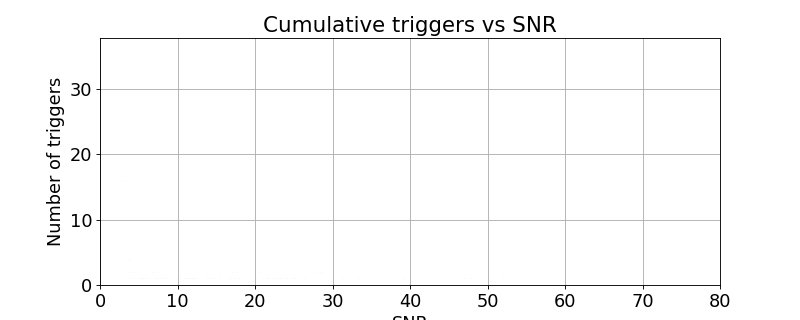

(Text(0.5, 1.0, 'Cumulative triggers vs SNR'),
 Text(0.5, 0, 'SNR'),
 Text(0, 0.5, 'Number of triggers'))

In [377]:
plt.figure(figsize=(10,4))
binning= 0.05#2.5 #0.2
bin_high = 80
bin_list=np.arange(0,bin_high,binning)

plt.hist(df_total['snr'], color='blue', bins=bin_list
                                        ,edgecolor='white', label='reduced',rwidth=1.0)
plt.hist(df_reduced['snr'], color='darkred', bins=bin_list
                                        ,edgecolor='white', label='reduced',rwidth=1.0 )
plt.xlim(0,bin_high), plt.grid(), 
plt.title('Cumulative triggers vs SNR'), plt.xlabel('SNR'), plt.ylabel('Number of triggers')

In [378]:
bin_list

array([0.000e+00, 5.000e-02, 1.000e-01, ..., 7.985e+01, 7.990e+01,
       7.995e+01])

<IPython.core.display.Javascript object>


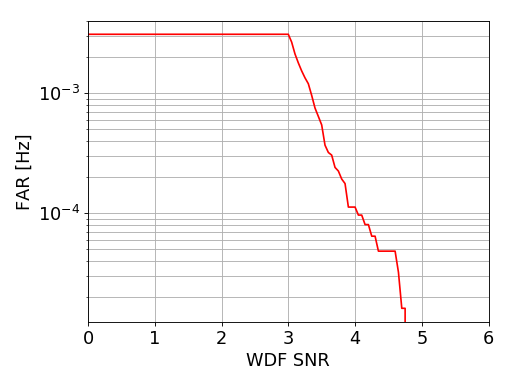

Figure saved at: 
/users/iess/WDF_vs_cWB/plots/WDF_far.png


In [384]:
FAR = []
FAR_m = []
FAR_p = []
for b in bin_list:
    N_above_th = np.shape(df_reduced[df_reduced['snr']>=b])[0]
    FAR.append(N_above_th/(N_files_processed*300))
    FAR_m.append((N_above_th-1)/(N_files_processed*300))
    FAR_p.append((N_above_th+1)/(N_files_processed*300))

FAR = np.array(FAR)
FAR_m = np.array(FAR_m)
FAR_p = np.array(FAR_p)

plt.figure()
#plt.semilogy(bin_list, FAR_m, color='blue'),
plt.semilogy(bin_list, FAR, color='red')
#plt.semilogy(bin_list, FAR_p, '.', color='red')
plt.grid(which='both'),
plt.xlabel('WDF SNR'), plt.ylabel('FAR [Hz]'), plt.xlim(0,6);
#plt.savefig(path_for_plots+'WDF_far.png', format='png')
print('Figure saved at: \n'+path_for_plots+'WDF_far.png')
plt.tight_layout(pad=1)

In [391]:
387/3600/50

0.00215

In [309]:
#data_yanyan_FAR = pd.DataFrame(data=np.hstack((np.reshape(bin_list, (-1,1)),np.reshape(FAR, (-1,1)))), columns=['snrWDF','FAR'])
#data_yanyan_FAR.to_csv('/users/iess/WDF_vs_cWB/WDFthresh_vs_FAR.csv', index=False)

In [33]:
max(df_reduced['snr']), max(df['snr'])

(79.70193913021734, 74.18803490301234)

In [34]:
datafile =  '/data/dev/ml/cwb_vs_wdf/data/no_dct/cbc/cbc_uniformedSNR_v2.h5'

In [35]:
with h5py.File(datafile, 'r') as h5:
    print(h5.keys())
    strain = np.array(h5['strain'])
    time = np.array(h5['time']).astype('float64')
    fs = 4096#np.array(h5['fs'])[0]    
    meta = np.array(h5['metadata'])
    template = np.array(h5['injection'])    # templates in h5['injection']


<KeysViewHDF5 ['fs', 'injection', 'metadata', 'strain', 'time']>


Parameters are: **M1*, *M2*, *S1z*, *S2z*, *inclination*, *coal_phase*, distance, *R.A.*, *dec*, *polarization*, *M_chirp*, injection time, *matched filter SNR**

In [59]:
cols[1]

'blue, green'

[3.6000000e+01 3.0000000e+01 1.6000000e-01 9.9999998e-03 1.9200000e+00
 1.8500000e+00 6.8676794e+02 3.1415927e+00 7.8539819e-01 3.1415927e+00
 2.8585478e+01 1.8436540e+06 5.8649821e+00]


<IPython.core.display.Javascript object>


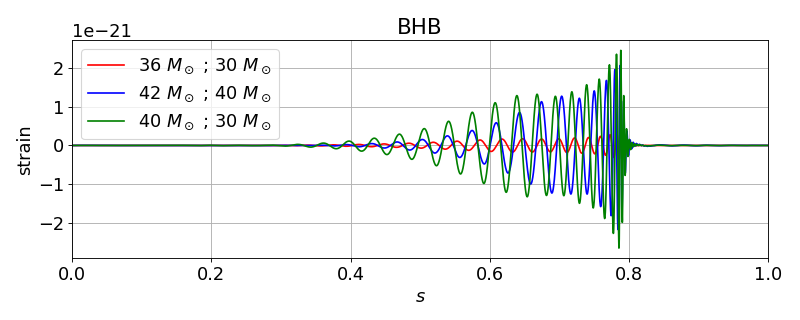

[3.6000000e+01 3.0000000e+01 1.6000000e-01 9.9999998e-03 1.9200000e+00
 1.8500000e+00 6.8676794e+02 3.1415927e+00 7.8539819e-01]
[4.2000000e+01 4.0000000e+01 1.6000000e-01 9.9999998e-03 1.9200000e+00
 1.8500000e+00 1.4074028e+02 3.1415927e+00 7.8539819e-01]
[4.0000000e+01 3.0000000e+01 1.6000000e-01 9.9999998e-03 1.9200000e+00
 1.8500000e+00 9.7076729e+01 3.1415927e+00 7.8539819e-01]


In [73]:
font = {'family' : 'cm',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

custom_choice = [0, 1000, 1500]#[0,10,100,1500,1200,1201]
fs = 4096
print(meta[custom_choice[0]])
col_count=0
cols=['red', 'blue', 'green']
plt.figure(figsize=(10,4))
for i in custom_choice:
   # labs=str(i)
    labs=str(int(meta[i,0]))+r' $M_\odot$ ; '+str(int(meta[i,1])) +r' $M_\odot$'
    plt.plot(np.arange(len(template[i]))/fs, template[i], label=labs, color=cols[col_count])
    col_count+=1
    print(meta[i,:9])
plt.grid(), plt.title('BHB'), plt.legend(), plt.xlim([0,1]), plt.xlabel(r'$s$'), plt.ylabel(r'strain')
plt.show(), plt.tight_layout(pad=1);
plt.savefig('/users/iess/WDF_vs_cWB/plots/sample_waveform.png', format='png')

In [74]:
# from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(meta[:,0], meta[:,1], meta[:,6], marker='o')
# ax.set_xlabel(r'$M_1$ [$M_{\odot}$]')
# ax.set_ylabel(r'$M_2$ [$M_{\odot}$]')
# ax.set_zlabel('distance [Mpc]')

In [75]:
np.shape(strain), np.shape(time), time[0], (time[-1]-550)/3600

((739532800,), (739532800,), 0.0, 50.0)

In [76]:
pd.DataFrame.append??

In [77]:
#plt.figure(),plt.plot(np.diff(df_coincident['gps']))
df_reduced

gps        snr     snrMax        freq  freqMax  duration  \
1      369.249512   3.234061  24.844176   48.000000     52.0  0.157959   
2      551.000000   4.120325  34.761203  136.000000    140.0  0.012451   
1      659.000000   3.155694  26.598974    8.000000     12.0  0.041016   
2      751.000000   4.391148  27.248289   76.000000     80.0  0.014160   
1      951.000000   3.335992  29.965238   72.000000     76.0  0.148193   
..            ...        ...        ...         ...      ...       ...   
5   179961.748535   3.327994  26.626994  190.666667    208.0  0.219971   
1   180050.748535   6.231264  21.101941   32.000000     36.0  0.002197   
2   180051.000000  51.515361  33.216060  100.000000    104.0  0.008789   
3   180150.748535  74.188035  27.971173   96.000000    100.0  0.009277   
4   180251.000000  51.046298  30.947497   96.000000    100.0  0.008545   

           wave  wt0           wt1  wt2  ...        rw1014        rw1015  \
1   BsplineC309  0.0  0.000000e+00  0.0  ...  2.210630e-24  2.266545e-24   
2   BsplineC206  0.0  0.000000e+00  0.0  ...  0.000000e+00  0.000000e+00   
1   BsplineC309  0.0  1.173258e-20  0.0  ...  1.262150e-22  1.688670e-22   
2   BsplineC309  0.0  0.000000e+00  0.0  ... -5.378654e-24 -7.406319e-24   
1   BsplineC309  0.0  0.000000e+00  0.0  ...  1.724087e-23  1.849396e-23   
..          ...  ...           ...  ...  ...           ...           ...   
5   BsplineC309  0.0  0.000000e+00  0.0  ...  2.528530e-22  2.828976e-22   
1   BsplineC309  0.0  0.000000e+00  0.0  ... -1.153266e-22 -9.561143e-23   
2   BsplineC206  0.0  0.000000e+00  0.0  ...  6.451685e-23  6.734783e-23   
3   BsplineC309  0.0  0.000000e+00  0.0  ...  1.557945e-22  1.487578e-22   
4   BsplineC206  0.0  0.000000e+00  0.0  ... -3.167751e-23 -2.909668e-23   

          rw1016        rw1017        rw1018        rw1019        rw1020  \
1   2.310063e-24  2.341184e-24  2.359907e-24  2.366233e-24  2.360161e-24   
2   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1   2.043220e-22  2.325802e-22  2.536415e-22  2.675058e-22  2.741733e-22   
2  -9.554873e-24 -1.182432e-23 -1.421465e-23 -1.672587e-23 -1.935798e-23   
1   1.977583e-23  2.108648e-23  2.242590e-23  2.379410e-23  2.519107e-23   
..           ...           ...           ...           ...           ...   
5   2.778956e-22  2.378470e-22  2.016006e-22  1.691564e-22  1.405145e-22   
1  -7.712037e-23 -5.985344e-23 -4.381064e-23 -2.899195e-23 -1.539739e-23   
2   7.017880e-23  7.300978e-23  7.584075e-23  7.867173e-23  8.150270e-23   
3   1.402016e-22  1.301257e-22  1.185302e-22  1.054151e-22  9.078036e-23   
4  -2.651586e-23 -2.393504e-23 -2.135421e-23 -1.877339e-23 -1.619257e-23   

          rw1021        rw1022        rw1023  
1   2.341693e-24  2.310826e-24  2.267562e-24  
2   0.000000e+00  0.000000e+00  0.000000e+00  
1   2.736438e-22  2.659175e-22  2.509942e-22  
2  -2.211097e-23 -2.498486e-23 -2.797963e-23  
1   2.661681e-23  2.807133e-23  2.955463e-23  
..           ...           ...           ...  
5   1.156747e-22  9.463721e-23  7.740190e-23  
1  -3.026948e-24  8.119370e-24  1.804157e-23  
2   8.433368e-23  8.716466e-23  8.999563e-23  
3   7.462605e-23  5.695214e-23  3.775861e-23  
4  -1.361174e-23 -1.103092e-23 -8.450098e-24  

[2620 rows x 2055 columns]

In [166]:
meta[2], meta[1][11]/fs

(array([3.6000000e+01, 3.0000000e+01, 1.6000000e-01, 9.9999998e-03,
        1.9200000e+00, 1.8500000e+00, 5.7228662e+02, 3.1415927e+00,
        7.8539819e-01, 3.1415927e+00, 2.8585478e+01, 2.6638240e+06,
        5.2278738e+00], dtype=float32),
 550.025390625)

In [167]:
all_inj_time

array([   350,    450,    550, ..., 180050, 180150, 180250])

In [184]:
len_template = len(template[0,:])         # only if all templates have equal length
dt_between_inj = 100
fs = 4096.
count = 0
window = len_template/fs
max_shift = 0.5                     # 0.5 seconds maximum random shift
missed = np.zeros(meta.shape[0])
missed_snr = np.array([])
wdf_threshold = 3
all_inj_time = np.arange(450,450+len(template)*dt_between_inj, 100)
df_coincident = pd.DataFrame([])
coincident_mf_SNR = []
coincident_WDF_SNR = []
coincident_mf_inj_time = []
jj= 0

for ind in range(meta.shape[0]):
    if 2>1:
#    try:
        inj_time = all_inj_time[ind]
       # inj_time = meta[ind][-1]
        if np.any(np.logical_and(df_reduced['gps']-window-max_shift < inj_time,  inj_time <= df_reduced['gps'])):
            count +=1
            if jj==0:
                df_coincident = df_reduced[(df_reduced['gps']-window-max_shift < inj_time) & 
                                            (inj_time <= df_reduced['gps'])]
                df_coincident_red = df_coincident[df_coincident['snr']==df_coincident['snr'].max()]
                coincident_WDF_SNR.append(np.sum(df_coincident['snr']))                
                coincident_mf_SNR.append(meta[ind][-1])
                coincident_mf_inj_time.append(meta[ind][-2])
                jj+=1
            else:
                df_coinc_to_append = df_reduced[(df_reduced['gps']-window-max_shift < inj_time) & 
                                                               (inj_time <= df_reduced['gps'])]                
                df_coinc_to_append_red = df_coinc_to_append[df_coinc_to_append['snr']==df_coinc_to_append['snr'].max()]
                coincident_WDF_SNR.append(np.sum(df_coinc_to_append['snr']))                
                df_coincident_red = df_coincident_red.append(df_coinc_to_append_red)
                coincident_mf_SNR.append(meta[ind][-1])
                coincident_mf_inj_time.append(meta[ind][-2])
                jj+=1
         #   df_reduced = df_reduced[df_reduced['gps']]
        else: 
            missed[ind] = ind 
#            missed_snr = np.append(missed_snr, snr_array[ind])
            missed_snr = np.append(missed_snr, meta[ind][-1])
    else:
#   except:
        print('Error.')
    
coincident_mf_SNR = np.array(coincident_mf_SNR)
print('*** WDF THRESHOLD = ' + str(wdf_threshold) + ' *** \n')
print(str(count) + ' triggers are coincident out of ' + str(meta.shape[0]) )
print("\n Missed triggers: \n \n", np.unique(missed).astype(int))
print("\n Missed triggers SNR: \n \n", (missed_snr).astype('f2'))


*** WDF THRESHOLD = 3 *** 

1699 triggers are coincident out of 1800

 Missed triggers: 
 
 [   0    2    4    6    7    8    9   11   12   13   14   17   18   19
   20   22   23   25   26   27   33   34   38   40   42   47   48   49
  450  452  454  455  456  457  460  461  462  463  464  465  466  467
  468  469  470  472  473  476  478  479  482  483  484  489  493  497
  900  901  902  903  904  905  907  910  911  912  915  916  918  919
  920  921  923  924  927  929  930  947 1350 1351 1352 1354 1355 1356
 1357 1358 1360 1361 1363 1367 1368 1369 1370 1371 1372 1376 1378 1382
 1387 1399 1799]

 Missed triggers SNR: 
 
 [ 5.863  5.227  9.56   5.41   5.56   8.29   6.94   4.758  7.266  4.66
  6.426  6.16   6.207  4.47   6.84   5.06  10.336  8.73   8.45   6.938
  9.11   9.664  5.355  7.297  7.156  6.2    9.8    7.652  6.668  6.113
  4.473  8.766  5.637  6.074  4.176  6.395  7.934  4.582  8.9    4.92
  4.676  8.516  7.414  4.91   4.42   4.824  8.39   8.414  8.78   9.75
  7.668  8.46  

In [185]:
df_coincident.index = np.arange(0,df_coincident.shape[0],1)


In [186]:
df_coincident_red

gps        snr     snrMax   freq  freqMax  duration  \
2      551.000000   4.120325  34.761203  136.0    140.0  0.012451   
2      751.000000   4.391148  27.248289   76.0     80.0  0.014160   
1      951.000000   3.335992  29.965238   72.0     76.0  0.148193   
2     1451.249512   4.716202  25.948862   92.0     96.0  0.009766   
1     1951.000000   3.032308  29.815963   72.0     76.0  0.002197   
..            ...        ...        ...    ...      ...       ...   
3   179851.000000  51.379759  31.027551   88.0     92.0  0.008789   
4   179951.000000  53.531292  33.953445   92.0    100.0  0.008789   
2   180051.000000  51.515361  33.216060  100.0    104.0  0.008789   
3   180150.748535  74.188035  27.971173   96.0    100.0  0.009277   
4   180251.000000  51.046298  30.947497   96.0    100.0  0.008545   

           wave  wt0           wt1  wt2  ...        rw1014        rw1015  \
2   BsplineC206  0.0  0.000000e+00  0.0  ...  0.000000e+00  0.000000e+00   
2   BsplineC309  0.0  0.000000e+00  0.0  ... -5.378654e-24 -7.406319e-24   
1   BsplineC309  0.0  0.000000e+00  0.0  ...  1.724087e-23  1.849396e-23   
2   BsplineC309  0.0  0.000000e+00  0.0  ... -7.841010e-23 -9.706293e-23   
1   BsplineC309  0.0  0.000000e+00  0.0  ... -1.120414e-23 -1.133764e-23   
..          ...  ...           ...  ...  ...           ...           ...   
3   BsplineC309  0.0 -1.126979e-21  0.0  ... -2.393788e-22 -2.957082e-22   
4   BsplineC206  0.0  0.000000e+00  0.0  ...  1.884172e-23  1.904402e-23   
2   BsplineC206  0.0  0.000000e+00  0.0  ...  6.451685e-23  6.734783e-23   
3   BsplineC309  0.0  0.000000e+00  0.0  ...  1.557945e-22  1.487578e-22   
4   BsplineC206  0.0  0.000000e+00  0.0  ... -3.167751e-23 -2.909668e-23   

          rw1016        rw1017        rw1018        rw1019        rw1020  \
2   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2  -9.554873e-24 -1.182432e-23 -1.421465e-23 -1.672587e-23 -1.935798e-23   
1   1.977583e-23  2.108648e-23  2.242590e-23  2.379410e-23  2.519107e-23   
2  -1.166054e-22 -1.370377e-22 -1.583596e-22 -1.805712e-22 -2.036724e-22   
1  -1.146513e-23 -1.158661e-23 -1.170209e-23 -1.181156e-23 -1.191502e-23   
..           ...           ...           ...           ...           ...   
3  -3.537165e-22 -4.134039e-22 -4.747704e-22 -5.378159e-22 -6.025405e-22   
4   1.924631e-23  1.944861e-23  1.965090e-23  1.985320e-23  2.005550e-23   
2   7.017880e-23  7.300978e-23  7.584075e-23  7.867173e-23  8.150270e-23   
3   1.402016e-22  1.301257e-22  1.185302e-22  1.054151e-22  9.078036e-23   
4  -2.651586e-23 -2.393504e-23 -2.135421e-23 -1.877339e-23 -1.619257e-23   

          rw1021        rw1022        rw1023  
2   0.000000e+00  0.000000e+00  0.000000e+00  
2  -2.211097e-23 -2.498486e-23 -2.797963e-23  
1   2.661681e-23  2.807133e-23  2.955463e-23  
2  -2.276634e-22 -2.525441e-22 -2.783144e-22  
1  -1.201247e-23 -1.210392e-23 -1.218936e-23  
..           ...           ...           ...  
3  -6.689441e-22 -7.370267e-22 -8.067884e-22  
4   2.025779e-23  2.046009e-23  2.066239e-23  
2   8.433368e-23  8.716466e-23  8.999563e-23  
3   7.462605e-23  5.695214e-23  3.775861e-23  
4  -1.361174e-23 -1.103092e-23 -8.450098e-24  

[1699 rows x 2055 columns]

In [187]:
strange = [45350.748535, 90351.000000, 135350.748535]
#strange_file/300

In [188]:
(90351-300)/300, 0.17*300

(300.17, 51.00000000000001)

In [189]:
with h5py.File('/data/dev/ml/cwb_vs_wdf/data/no_dct/cbc/splitted_cbc_cbc_uniformedSNR_v2/part_313/cbc_uniformedSNR_v2_white.h5', 'r') as f:
    print(list(f.keys()))
    h_d = np.array(f['strain_white'])
    


['strain_white']


In [190]:
strange_t = time[int(fs)*int(strange[0]-1):int(fs)*(int(strange[0])+2)]
strange_h = h_d#[int(fs)*int(strange[0]-1):int(fs)*(int(strange[0])+2)]
#strange_rh = np.array(df_coincident.iloc[843][-1024:])

In [191]:
plt.figure(figsize=(10,4)), 
plt.plot(np.arange(0,len(strange_h)/fs, 1/fs), strange_h, color='black'),plt.grid(),
plt.xlim(250.8,251.2), 
plt.ylim(-1.0e-20, 1.0e-20)
plt.xlabel(r'$s$'), plt.ylabel(r'strain')
plt.tight_layout(pad=1);
plt.savefig('/users/iess/WDF_vs_cWB/plots/sample_strain_inj.png', format='png')
#plt.plot(np.arange(50.9,50.9+len(strange_rh)/fs, 1/fs), strange_rh)

<IPython.core.display.Javascript object>

In [192]:
df_coincident.loc[np.where(coincident_mf_SNR<10)]

KeyError: "None of [Int64Index([   4,    5,    8,   10,   15,   16,  422,  423,  424,  427,  438,\n             441,  442,  443,  844,  845,  846,  848,  849,  869, 1273, 1275,\n            1278, 1285, 1293, 1294, 1297, 1299],\n           dtype='int64')] are in the [index]"

In [202]:
(np.reshape(coincident_mf_inj_time, (-1,1)),
np.reshape(coincident_mf_SNR, (-1,1)), 
np.reshape(coincident_WDF_SNR, (-1,1)))

array([[ 4.12032457],
       [ 4.39114766],
       [ 3.33599162],
       ...,
       [57.74662536],
       [74.1880349 ],
       [51.04629791]])

In [203]:
np.shape(np.hstack((np.reshape(coincident_mf_inj_time, (-1,1)),
np.reshape(coincident_mf_SNR, (-1,1)), 
np.reshape(coincident_WDF_SNR, (-1,1)))))

(1699, 3)

In [214]:

columns = ["time_mf", "snrmf", "snrWDF"]
data = np.hstack((np.reshape(coincident_mf_inj_time, (-1,1))/fs,np.reshape(coincident_mf_SNR, (-1,1)), np.reshape(coincident_WDF_SNR, (-1,1))))
data_yanyan = pd.DataFrame(data=data, columns=columns)


In [215]:
data_yanyan.to_csv('/users/iess/WDF_vs_cWB/mfsnr_vs_WDFsnr.csv', index=False)

In [216]:
pd.read_csv('/users/iess/WDF_vs_cWB/mfsnr_vs_WDFsnr.csv')

time_mf      snrmf     snrWDF
0        550.025391  12.199162   4.120325
1        750.309082  11.212532   4.391148
2        950.181641  10.541704   3.335992
3       1450.249268  10.949967   4.716202
4       1950.214355   6.689938   3.032308
...             ...        ...        ...
1694  179850.234375  92.400589  58.535356
1695  179950.171875  93.045525  53.531292
1696  180050.187500  93.694153  57.746625
1697  180150.140625  92.861824  74.188035
1698  180250.187500  94.085617  51.046298

[1699 rows x 3 columns]

<IPython.core.display.Javascript object>


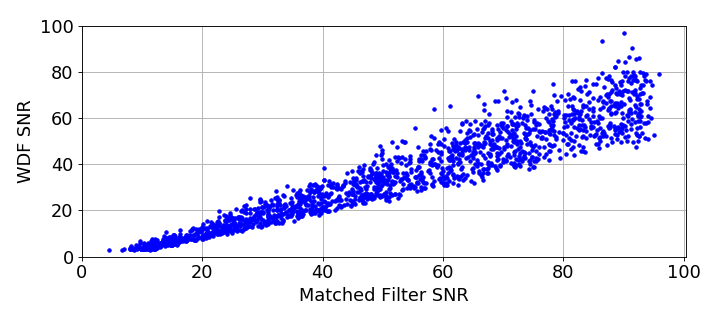

In [210]:
plt.figure(figsize=(9,4)), 
#indi = 
#plt.plot(coincident_mf_SNR, '.g',label='Matched Filter SNR')
#plt.plot(df_coincident['snr'], '.b', label='WDF SNR')
plt.plot(coincident_mf_SNR, coincident_WDF_SNR, '.b')
#plt.plot(coincident_mf_SNR, df_coincident['snrMax'], '.b')
plt.xlabel('Matched Filter SNR'), plt.ylabel('WDF SNR')
plt.grid(), plt.ylim(0, 100)#,plt.legend()
plt.tight_layout()

In [147]:
coincident_mf_SNR

array([ 5.227874 ,  9.558851 ,  5.4099545, ..., 92.861824 , 94.08562  ,
       93.69198  ], dtype=float32)

In [130]:
df_coincident['snr'].shape, coincident_mf_SNR.shape

((1699,), (1699,))

In [49]:
inj_ex = 1357
ind1, ind2 = int((349+100*inj_ex)*fs), int((352+100*inj_ex)*fs)
mid1, mid2 = int((350+100*inj_ex)*fs), int((351+100*inj_ex)*fs)
plt.figure(figsize=(10,5)), 
plt.plot(np.arange(ind1/fs,ind2/fs, 1/fs), strain[ind1:ind2],'b', label='raw data'),plt.grid()
plt.plot(np.arange(mid1, mid2, 1)/fs, template[inj_ex],'k', label='CBC signal'),
plt.plot(df_total['gps'], np.zeros_like(df_total['gps']), '.g', label='WDF trigger')
plt.plot(all_inj_time, np.zeros_like(all_inj_time), '.r', label='injection'), plt.xlim(ind1/fs,ind2/fs)
plt.legend()
plt.show();

<IPython.core.display.Javascript object>

In [52]:
bin_step = 4
binning = np.arange(0,max(meta[:,-1]), bin_step)

plt.figure(figsize=(10,5)), 
#plt.hist(meta[:,-1],bins=binning, label='total'), 
plt.hist(meta[:,-1],bins=binning, label='signals'), 
plt.hist(missed_snr, bins=binning, label='missed'), 
plt.xlabel('SNR'), plt.ylabel('Counts'), plt.title('CBC uniform SNR efficiency')
plt.xlim(0,max(meta[:,-1])), plt.grid(), plt.legend();



<IPython.core.display.Javascript object>

In [53]:
detection_percentage, avg_snr = np.array([]), np.array([])

for bins in binning[:-1]:
    signals_in_range = np.any(np.logical_and(bins<meta[:,-1], meta[:,-1]<bins+bin_step))
    #print('in range '+str(bins) + ' to ' +str(bins+bin_step) + ': ' + str(signals_in_range))
   
    if signals_in_range==True:
        n_missed = np.count_nonzero(np.logical_and(bins<missed_snr, missed_snr<bins+bin_step))
        total = np.count_nonzero(np.logical_and(bins<meta[:,-1], meta[:,-1]<bins+bin_step))
        detection_percentage = np.append(detection_percentage, 100*(total-n_missed)/total)
        avg_snr = np.append(avg_snr, np.mean(meta[np.logical_and(bins<meta[:,-1], meta[:,-1]<bins+bin_step),-1]))

In [54]:
labels = ['WDF_thr = 2','WDF_thr = 3','WDF_thr = 4','WDF_thr = 5','WDF_thr = 6','WDF_thr = 7']

In [55]:
#avg_snr2, detection_percentage2 = avg_snr, detection_percentage
avg_snr3, detection_percentage3 = avg_snr, detection_percentage

#avg_snr4, detection_percentage4 = avg_snr, detection_percentage
#avg_snr5, detection_percentage5 = avg_snr, detection_percentage
#avg_snr6, detection_percentage6 = avg_snr, detection_percentage
#avg_snr7, detection_percentage7 = avg_snr, detection_percentage

<IPython.core.display.Javascript object>


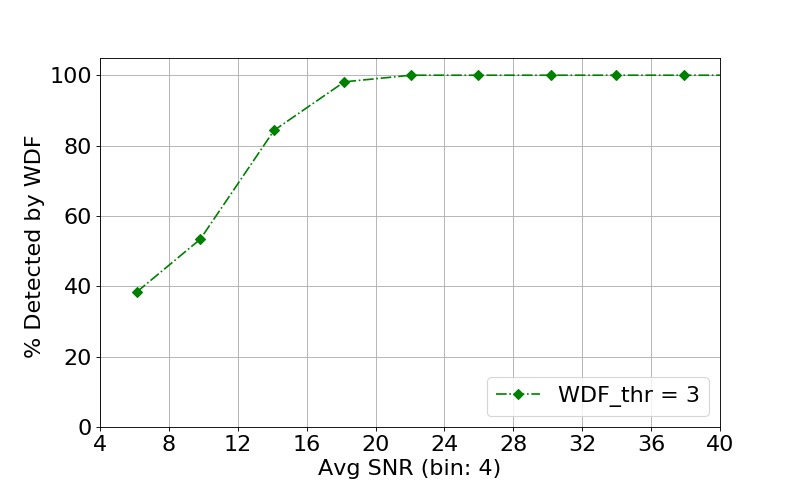

In [59]:
font = {'family' : 'cm',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

plt.figure(figsize=(10,6)), 
#plt.plot(avg_snr, detection_percentage, '-.D', color='r'), plt.grid(), plt.title('WDF efficiency vs matched filter SNR for CBC')
#plt.plot(avg_snr2, detection_percentage2, '-.D', color='r',label=labels[0]), plt.grid(), plt.title('WDF efficiency vs matched filter SNR for CBC')
plt.ylim([0,105]), plt.xticks(binning), 
plt.plot(avg_snr3, detection_percentage3, '-.D', color='g',label=labels[1])
#plt.plot(avg_snr4, detection_percentage4, '-.D', color='m',label=labels[2])
#plt.plot(avg_snr5, detection_percentage5, '-.D', color='b',label=labels[3])
#plt.plot(avg_snr6, detection_percentage6, '-.D', color='c',label=labels[4])
#plt.plot(avg_snr7, detection_percentage7, '-.D', color='k',label=labels[5])


#plt.plot(avg_snr, detection_percentage, '-.D', color='r')
plt.grid()
plt.legend(loc=4), # 4 is lower right
plt.ylabel('% Detected by WDF ', ), plt.xlabel('Avg SNR (bin: '+ str(bin_step) + ')'), plt.xlim(4,40);
#plt.savefig('/users/iess/WDF_vs_cWB/plots/WDF_efficiency_SNR_0_to_40.png')


# WDF vs CBC Matched Filter comparison

In [ ]:
df_SNR_sorted = df_total.sort_values('snr')
#df_SNR_sorted.tail(3000)

In [ ]:
seconds_per_file = 300    # from old, cross check
N_triggers = 0
N_triggers_red = 0
N_coincidences = 0

for i in range(601):
    path_to_file = path + 'part_'+str(i) + "/wp/"
    if 2>1:
        try:
            df = pd.read_csv(path_to_file + csv_name)
            df_red = df[df['gps']>=10]
            for j in range(300):
                new_gps = df_red["gps"] + j
                if new_gps > 310:
                    new_gps = new_gps - 300
                df_red2["gps"] = df_red["gps"] + 1
                if df_
            df["gps"] = df["gps"] + 300 + seconds_per_file*i
            
            df_total = df_total.append(df)
            df_reduced = df_reduced.append(df_red)
            print('Read file ', str(i))
            print('Number of triggers in file: '+ str(df.shape[0]))
            N_triggers += df.shape[0]
            N_triggers_red += df_red.shape[0]
        except:
            print('Error: file not found. Skipping to next, adding missing time length.')
            continue

#    df_total.to_csv('./'+trigger_file) 

    else:
        print('.csv trigger file already exists.')
        df_total = pd.read_csv('./'+trigger_file)

# CBC Reconstruction

In [195]:
df_reduced.shape, df_coincident_red.shape, df_total.shape

((2620, 2055), (1699, 2055), (3161, 2055))

In [192]:
all_inj_time

array([   350,    450,    550, ..., 180050, 180150, 180250])

In [196]:
df_coincident_red

gps        snr     snrMax   freq  freqMax  duration  \
2      551.000000   4.120325  34.761203  136.0    140.0  0.012451   
2      751.000000   4.391148  27.248289   76.0     80.0  0.014160   
1      951.000000   3.335992  29.965238   72.0     76.0  0.148193   
2     1451.249512   4.716202  25.948862   92.0     96.0  0.009766   
1     1951.000000   3.032308  29.815963   72.0     76.0  0.002197   
..            ...        ...        ...    ...      ...       ...   
3   179851.000000  51.379759  31.027551   88.0     92.0  0.008789   
4   179951.000000  53.531292  33.953445   92.0    100.0  0.008789   
2   180051.000000  51.515361  33.216060  100.0    104.0  0.008789   
3   180150.748535  74.188035  27.971173   96.0    100.0  0.009277   
4   180251.000000  51.046298  30.947497   96.0    100.0  0.008545   

           wave  wt0           wt1  wt2  ...        rw1014        rw1015  \
2   BsplineC206  0.0  0.000000e+00  0.0  ...  0.000000e+00  0.000000e+00   
2   BsplineC309  0.0  0.000000e+00  0.0  ... -5.378654e-24 -7.406319e-24   
1   BsplineC309  0.0  0.000000e+00  0.0  ...  1.724087e-23  1.849396e-23   
2   BsplineC309  0.0  0.000000e+00  0.0  ... -7.841010e-23 -9.706293e-23   
1   BsplineC309  0.0  0.000000e+00  0.0  ... -1.120414e-23 -1.133764e-23   
..          ...  ...           ...  ...  ...           ...           ...   
3   BsplineC309  0.0 -1.126979e-21  0.0  ... -2.393788e-22 -2.957082e-22   
4   BsplineC206  0.0  0.000000e+00  0.0  ...  1.884172e-23  1.904402e-23   
2   BsplineC206  0.0  0.000000e+00  0.0  ...  6.451685e-23  6.734783e-23   
3   BsplineC309  0.0  0.000000e+00  0.0  ...  1.557945e-22  1.487578e-22   
4   BsplineC206  0.0  0.000000e+00  0.0  ... -3.167751e-23 -2.909668e-23   

          rw1016        rw1017        rw1018        rw1019        rw1020  \
2   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2  -9.554873e-24 -1.182432e-23 -1.421465e-23 -1.672587e-23 -1.935798e-23   
1   1.977583e-23  2.108648e-23  2.242590e-23  2.379410e-23  2.519107e-23   
2  -1.166054e-22 -1.370377e-22 -1.583596e-22 -1.805712e-22 -2.036724e-22   
1  -1.146513e-23 -1.158661e-23 -1.170209e-23 -1.181156e-23 -1.191502e-23   
..           ...           ...           ...           ...           ...   
3  -3.537165e-22 -4.134039e-22 -4.747704e-22 -5.378159e-22 -6.025405e-22   
4   1.924631e-23  1.944861e-23  1.965090e-23  1.985320e-23  2.005550e-23   
2   7.017880e-23  7.300978e-23  7.584075e-23  7.867173e-23  8.150270e-23   
3   1.402016e-22  1.301257e-22  1.185302e-22  1.054151e-22  9.078036e-23   
4  -2.651586e-23 -2.393504e-23 -2.135421e-23 -1.877339e-23 -1.619257e-23   

          rw1021        rw1022        rw1023  
2   0.000000e+00  0.000000e+00  0.000000e+00  
2  -2.211097e-23 -2.498486e-23 -2.797963e-23  
1   2.661681e-23  2.807133e-23  2.955463e-23  
2  -2.276634e-22 -2.525441e-22 -2.783144e-22  
1  -1.201247e-23 -1.210392e-23 -1.218936e-23  
..           ...           ...           ...  
3  -6.689441e-22 -7.370267e-22 -8.067884e-22  
4   2.025779e-23  2.046009e-23  2.066239e-23  
2   8.433368e-23  8.716466e-23  8.999563e-23  
3   7.462605e-23  5.695214e-23  3.775861e-23  
4  -1.361174e-23 -1.103092e-23 -8.450098e-24  

[1699 rows x 2055 columns]

<IPython.core.display.Javascript object>


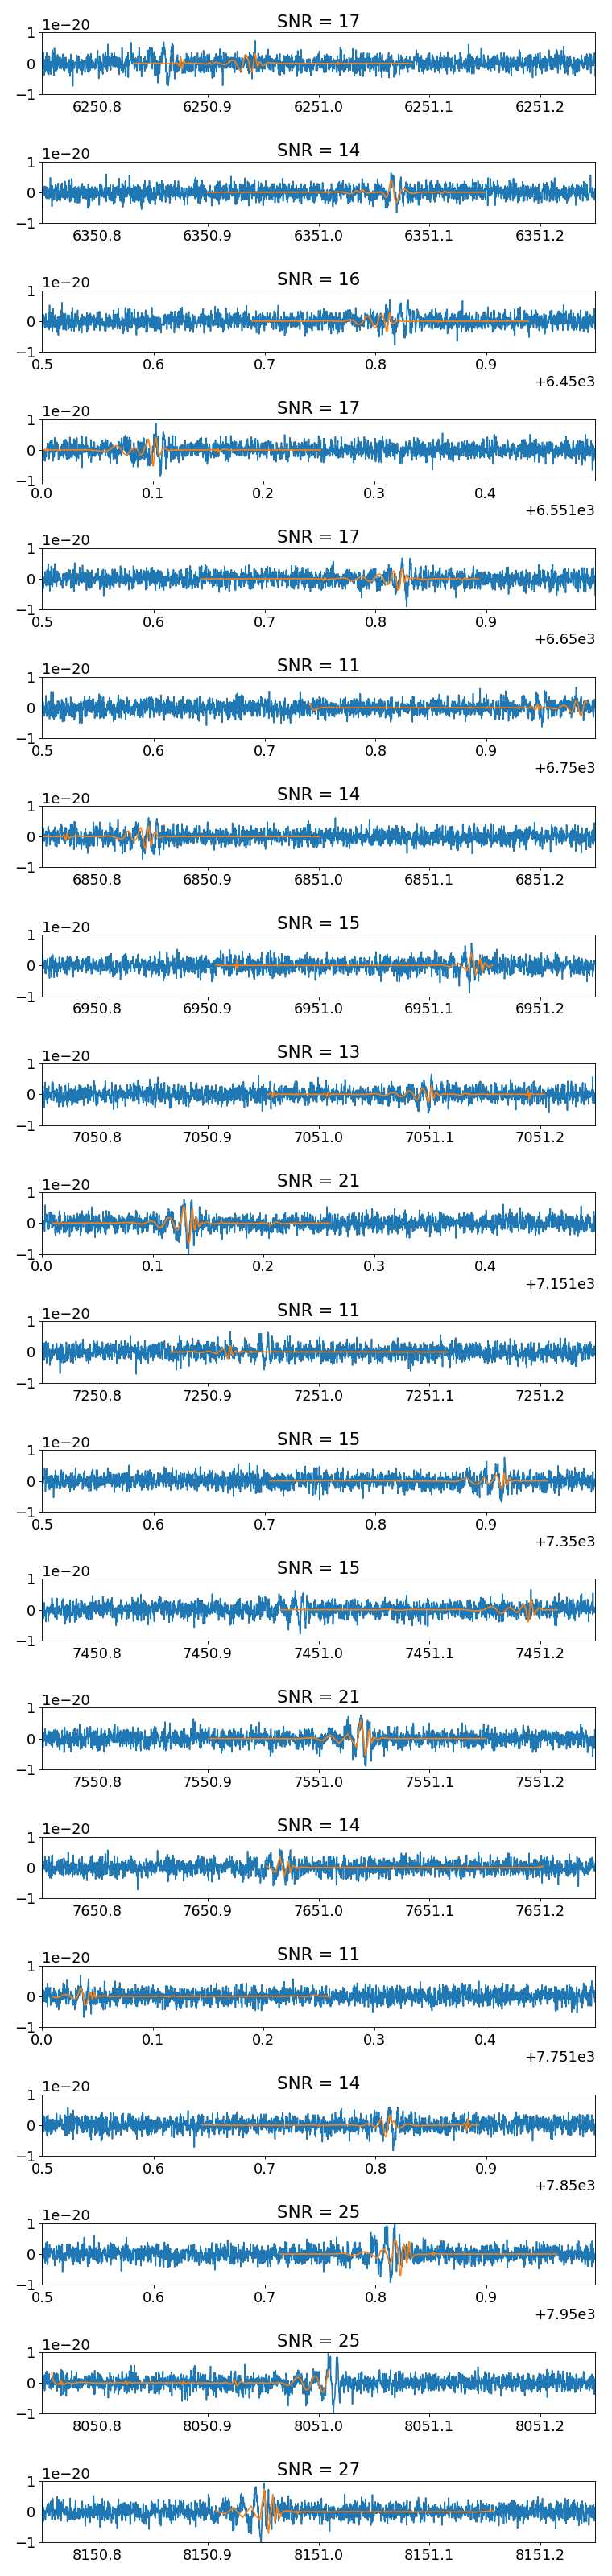

['strain_white']
File nr. 19
['strain_white']
File nr. 20
['strain_white']
File nr. 20
['strain_white']
File nr. 20
['strain_white']
File nr. 21
['strain_white']
File nr. 21
['strain_white']
File nr. 21
['strain_white']
File nr. 22
['strain_white']
File nr. 22
['strain_white']
File nr. 22
['strain_white']
File nr. 23
['strain_white']
File nr. 23
['strain_white']
File nr. 23
['strain_white']
File nr. 24
['strain_white']
File nr. 24
['strain_white']
File nr. 24
['strain_white']
File nr. 25
['strain_white']
File nr. 25
['strain_white']
File nr. 25
['strain_white']
File nr. 26


In [336]:
plt.figure(figsize=(9.5,40)),
wdf_window = 0.25

ic=0
for i_sign in range(30,50):
    ic+=1
#    i_sign = 119
    i_file = int((df_coincident_red.iloc[i_sign]['gps']-300)/300)

    with h5py.File('/data/dev/ml/cwb_vs_wdf/data/no_dct/cbc/splitted_cbc_cbc_uniformedSNR_v2/part_'+str(i_file)+'/cbc_uniformedSNR_v2_white.h5', 'r') as f:
        print(list(f.keys()))
        print('File nr. ' +str(i_file))
        h_i = np.array(f['strain_white'])
        t_i = 300*(i_file+1)+np.arange(0,len(h_i)/fs,1/fs)


    cbc_i = np.array(df_coincident_red.iloc[i_sign][-1024:])

    gps_trigg = df_coincident_red.iloc[i_sign]['gps']
    i_subsegment = np.logical_and(gps_trigg-wdf_window<t_i, t_i<gps_trigg+wdf_window)
    gps_strain = t_i[i_subsegment]

    ind_max = np.argmax(h_i[i_subsegment])
    t_i_max = gps_strain[ind_max]

    ind_rec_max = np.argmax(cbc_i)
    t_rec_max = gps_trigg + ind_rec_max/fs

    t_diff = (t_i_max-t_rec_max)
    t_rec =  gps_trigg + t_diff + np.arange(0,1024/fs, 1/fs)  # need to correct for  peak?

    #ar
    plt.subplot(20,1,ic)
    plt.plot(t_i, h_i)
    plt.plot(t_rec, cbc_i),
    plt.axvline(all_inj_time[11], color='black'), plt.title('SNR = '+str(int(coincident_mf_SNR[i_sign])))

    #for ii in range(len(all_inj_time)):
     #   plt.axvline(all_inj_time[ii], 'k')
    plt.xlim(gps_strain.min(), gps_strain.max()), plt.ylim(-1e-20,1e-20)
plt.tight_layout(pad=1)

<IPython.core.display.Javascript object>


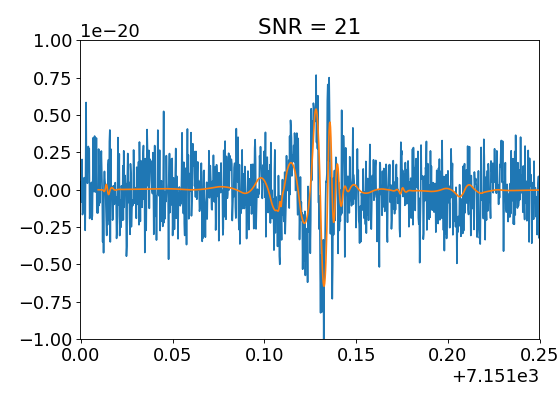

['strain_white']
File nr. 22


In [346]:
plt.figure(figsize=(7,5)),
wdf_window = 0.25

ic=0
for i_sign in range(39,40):
    ic+=1
#    i_sign = 119
    i_file = int((df_coincident_red.iloc[i_sign]['gps']-300)/300)

    with h5py.File('/data/dev/ml/cwb_vs_wdf/data/no_dct/cbc/splitted_cbc_cbc_uniformedSNR_v2/part_'+str(i_file)+'/cbc_uniformedSNR_v2_white.h5', 'r') as f:
        print(list(f.keys()))
        print('File nr. ' +str(i_file))
        h_i = np.array(f['strain_white'])
        t_i = 300*(i_file+1)+np.arange(0,len(h_i)/fs,1/fs)


    cbc_i = np.array(df_coincident_red.iloc[i_sign][-1024:])

    gps_trigg = df_coincident_red.iloc[i_sign]['gps']
    i_subsegment = np.logical_and(gps_trigg-wdf_window<t_i, t_i<gps_trigg+wdf_window)
    gps_strain = t_i[i_subsegment]

    ind_max = np.argmax(h_i[i_subsegment])
    t_i_max = gps_strain[ind_max]

    ind_rec_max = np.argmax(cbc_i)
    t_rec_max = gps_trigg + ind_rec_max/fs

    t_diff = (t_i_max-t_rec_max)
    t_rec =  gps_trigg + t_diff + np.arange(0,1024/fs, 1/fs)  # need to correct for  peak?

    #ar
    #plt.subplot(2,1,ic)
    plt.plot(t_i, h_i)
    plt.plot(t_rec, cbc_i),
    plt.axvline(all_inj_time[11], color='black'), plt.title('SNR = '+str(int(coincident_mf_SNR[i_sign])))

    #for ii in range(len(all_inj_time)):
     #   plt.axvline(all_inj_time[ii], 'k')
    plt.xlim(gps_strain.min(), gps_strain.min()+wdf_window), plt.ylim(-1e-20,1e-20)
plt.tight_layout(pad=1)

## Apply to SNR = 22.5 file

In [5]:
ls -l /data/dev/ml/cwb_vs_wdf/data/cbc/splitted/cbc_1/whitening_parameters/

total 8892
-rw-r--r-- 1 morawski pl  153515 Feb 25  2020 ARcoeff-AR4000-fs4096-strain.txt
-rw-r--r-- 1 morawski pl     753 Feb 26  2020 fileParametersUsed.json
-rw-r--r-- 1 morawski pl 1409845 Feb 25  2020 LVcoeff-AR4000-fs4096-strain.txt
-rw-r--r-- 1 morawski pl 7530704 Feb 26  2020 WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR2.csv


In [7]:
fs =4096
with h5py.File('/data/dev/ml/cwb_vs_wdf/data/cbc/splitted/cbc_0/cbc_20h_fixedSNR.h5', 'r') as ff:
    print(list(ff.keys()))
    print(np.shape(np.array(ff['strain']))[0]/fs)
    

['strain']
3600.0


In [8]:
cbc_directories_fixed_SNR = glob.glob('/data/dev/ml/cwb_vs_wdf/data/cbc/splitted/cbc_*')

In [9]:
'/data/dev/ml/cwb_vs_wdf/data/cbc/splitted/cbc_0/cbc_20h_fixedSNR_white.h5'

'/data/dev/ml/cwb_vs_wdf/data/cbc/splitted/cbc_0/cbc_20h_fixedSNR_white.h5'

In [10]:
with h5py.File('/data/dev/ml/cwb_vs_wdf/data/cbc/cbc_20h_fixedSNR.h5', 'r') as ff:
    print(list(ff.keys()))
    metadata = np.array(ff['metadata'])
    injection_wv = np.array(ff['injection'])
   # print(np.shape(np.array(ff['time'])))
injection_gps = metadata[:,11]

['fs', 'injection', 'metadata', 'strain', 'time']


In [42]:
plt.figure(), plt.plot(np.arange(0,1,1/4096.),injection_wv[2])

<IPython.core.display.Javascript object>

(<Figure size 640x480 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7f370e63f4a8>])

In [397]:
(metadata[:,11]).astype('float64')

array([  450.,   550.,   650.,   750.,   850.,   950.,  1050.,  1150.,
        1250.,  1350.,  1450.,  1550.,  1650.,  1750.,  1850.,  1950.,
        2050.,  2150.,  2250.,  2350.,  2450.,  2550.,  2650.,  2750.,
        2850.,  2950.,  3050.,  3150.,  3250.,  3350.,  3450.,  3550.,
        3650.,  3750.,  3850.,  3950.,  4050.,  4150.,  4250.,  4350.,
        4450.,  4550.,  4650.,  4750.,  4850.,  4950.,  5050.,  5150.,
        5250.,  5350.,  5450.,  5550.,  5650.,  5750.,  5850.,  5950.,
        6050.,  6150.,  6250.,  6350.,  6450.,  6550.,  6650.,  6750.,
        6850.,  6950.,  7050.,  7150.,  7250.,  7350.,  7450.,  7550.,
        7650.,  7750.,  7850.,  7950.,  8050.,  8150.,  8250.,  8350.,
        8450.,  8550.,  8650.,  8750.,  8850.,  8950.,  9050.,  9150.,
        9250.,  9350.,  9450.,  9550.,  9650.,  9750.,  9850.,  9950.,
       10050., 10150., 10250., 10350., 10450., 10550., 10650., 10750.,
       10850., 10950., 11050., 11150., 11250., 11350., 11450., 11550.,
      

In [12]:
sec_per_file=3600
i=0
triggers_fix_total = pd.DataFrame()
for fi in cbc_directories_fixed_SNR:
    file_csv = fi+'/whitening_parameters/WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR2.csv'
    triggers_fix = pd.read_csv(file_csv)
    triggers_fix["gps"] = triggers_fix["gps"] + 350 + sec_per_file*i
    triggers_fix_total = triggers_fix_total.append(triggers_fix)
    i+=1


In [13]:
triggers_fix_total.iloc[0]['gps']

350.0

In [14]:
trig_signals = triggers_fix_total[triggers_fix_total['snr']>8]


In [15]:
trig_signals.index

Int64Index([  0,  15,  25,  32,  40,  46,  51,  59,  69,  80,
            ...
            241, 249, 258, 272, 283, 294, 298, 305, 309, 316],
           dtype='int64', length=742)

<IPython.core.display.Javascript object>


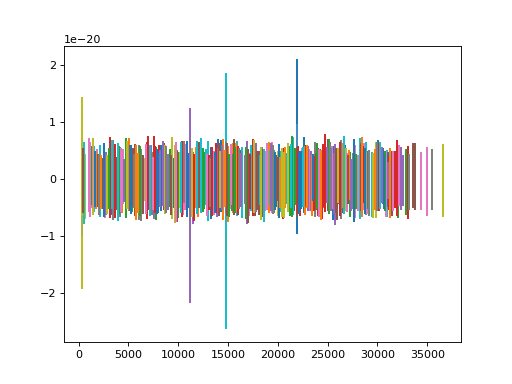

In [18]:
plt.figure()
for tr in trig_signals.index:
#    print(tr)
    rec_wv = trig_signals.iloc[tr][-1024:]
    trig_gps = trig_signals.iloc[tr][0]
    plt.plot(trig_gps+ np.arange(0,1024)/fs,rec_wv) 

In [19]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [20]:
trig_signals

gps        snr     snrMax        freq  freqMax  duration  \
0      350.000000  27.217913  31.896872   88.000000     92.0  0.002197   
15     450.748535  14.891807  26.841199   76.000000     80.0  0.008545   
25     550.748535  17.308247  33.007449   72.000000     76.0  0.008789   
32     650.748535  13.728475  30.471713   96.000000    100.0  0.008545   
40     750.748535  13.692939  33.606545   92.000000     96.0  0.013184   
..            ...        ...        ...         ...      ...       ...   
294  71850.748535  13.831220  30.115443  142.666667    152.0  0.008057   
298  71950.748535  15.562973  31.474471  128.000000    132.0  0.008301   
305  72050.748535  16.135225  27.057146  112.000000    116.0  0.008545   
309  72150.748535  12.994448  29.922541   88.000000     92.0  0.002197   
316  72250.748535  12.076480  23.258085   84.000000     88.0  0.013428   

            wave           rw0           rw1           rw2  ...        rw1014  \
0    BsplineC309 -1.010439e-20 -1.465182e-20 -1.767327e-20  ... -1.481214e-22   
15   BsplineC309  6.208933e-23  4.453852e-23  2.764165e-23  ...  1.074884e-22   
25   BsplineC309 -8.918840e-24  7.820878e-24  1.755773e-23  ... -9.071238e-23   
32   BsplineC309 -6.341007e-22 -3.906532e-22 -1.875936e-22  ... -2.924476e-23   
40   BsplineC309 -4.124858e-22 -4.816569e-22 -5.293471e-22  ...  1.259363e-23   
..           ...           ...           ...           ...  ...           ...   
294  BsplineC309  1.766122e-22  1.806171e-22  1.843907e-22  ...  1.384667e-22   
298  BsplineC309 -5.513702e-23 -5.479927e-23 -5.455844e-23  ... -1.916700e-23   
305  BsplineC309 -1.546034e-21 -9.858705e-22 -5.091277e-22  ...  6.219037e-21   
309  BsplineC309  1.285227e-23  1.255480e-23  1.226002e-23  ...  1.520983e-23   
316  BsplineC309 -2.285592e-23 -2.066482e-23 -1.856058e-23  ... -2.762688e-23   

           rw1015        rw1016        rw1017        rw1018        rw1019  \
0    1.784034e-22  5.712960e-22  1.030556e-21  1.062333e-21  6.666258e-22   
15   1.135938e-22  1.173336e-22  1.187077e-22  1.177162e-22  1.143591e-22   
25  -8.953696e-23 -8.680511e-23 -8.251683e-23 -7.667212e-23 -6.927098e-23   
32   1.333977e-22  3.364116e-22  5.797969e-22  6.408267e-22  5.195010e-22   
40  -8.099014e-24 -3.363950e-23 -6.402783e-23 -9.926401e-23 -1.393480e-22   
..            ...           ...           ...           ...           ...   
294  1.421255e-22  1.458189e-22  1.495470e-22  1.533096e-22  1.571069e-22   
298 -2.598334e-23 -3.208428e-23 -3.746980e-23 -4.213992e-23 -4.609462e-23   
305  5.962121e-21  5.348191e-21  4.377248e-21  3.317347e-21  2.168487e-21   
309  1.502457e-23  1.482809e-23  1.462039e-23  1.440146e-23  1.417132e-23   
316 -2.855215e-23 -2.916578e-23 -2.946778e-23 -2.945814e-23 -2.913686e-23   

           rw1020        rw1021        rw1022        rw1023  
0   -1.565652e-22 -1.407240e-21 -3.482102e-21 -6.381153e-21  
15   1.086364e-22  1.005480e-22  9.009409e-23  7.727451e-23  
25  -6.031341e-23 -4.979941e-23 -3.772899e-23 -2.410213e-23  
32   2.158198e-22 -2.702169e-22 -5.738826e-22 -6.951772e-22  
40  -1.842799e-22 -2.340596e-22 -2.886872e-22 -3.481626e-22  
..            ...           ...           ...           ...  
294  1.609387e-22  1.648052e-22  1.687063e-22  1.726419e-22  
298 -4.933392e-23 -5.185781e-23 -5.366629e-23 -5.475936e-23  
305  9.306671e-22 -3.961113e-22 -1.251154e-21 -1.634462e-21  
309  1.392995e-23  1.367736e-23  1.341355e-23  1.313852e-23  
316 -2.850394e-23 -2.755939e-23 -2.630320e-23 -2.473538e-23  

[742 rows x 1031 columns]

In [436]:
trig_signals

gps        snr     snrMax        freq  freqMax  duration  \
0      350.000000  27.217913  31.896872   88.000000     92.0  0.002197   
1      450.748535  14.891807  26.841199   76.000000     80.0  0.008545   
2      550.748535  17.308247  33.007449   72.000000     76.0  0.008789   
3      650.748535  13.728475  30.471713   96.000000    100.0  0.008545   
4      750.748535  13.692939  33.606545   92.000000     96.0  0.013184   
..            ...        ...        ...         ...      ...       ...   
737  71850.748535  13.831220  30.115443  142.666667    152.0  0.008057   
738  71950.748535  15.562973  31.474471  128.000000    132.0  0.008301   
739  72050.748535  16.135225  27.057146  112.000000    116.0  0.008545   
740  72150.748535  12.994448  29.922541   88.000000     92.0  0.002197   
741  72250.748535  12.076480  23.258085   84.000000     88.0  0.013428   

            wave           rw0           rw1           rw2  ...        rw1014  \
0    BsplineC309 -1.010439e-20 -1.465182e-20 -1.767327e-20  ... -1.481214e-22   
1    BsplineC309  6.208933e-23  4.453852e-23  2.764165e-23  ...  1.074884e-22   
2    BsplineC309 -8.918840e-24  7.820878e-24  1.755773e-23  ... -9.071238e-23   
3    BsplineC309 -6.341007e-22 -3.906532e-22 -1.875936e-22  ... -2.924476e-23   
4    BsplineC309 -4.124858e-22 -4.816569e-22 -5.293471e-22  ...  1.259363e-23   
..           ...           ...           ...           ...  ...           ...   
737  BsplineC309  1.766122e-22  1.806171e-22  1.843907e-22  ...  1.384667e-22   
738  BsplineC309 -5.513702e-23 -5.479927e-23 -5.455844e-23  ... -1.916700e-23   
739  BsplineC309 -1.546034e-21 -9.858705e-22 -5.091277e-22  ...  6.219037e-21   
740  BsplineC309  1.285227e-23  1.255480e-23  1.226002e-23  ...  1.520983e-23   
741  BsplineC309 -2.285592e-23 -2.066482e-23 -1.856058e-23  ... -2.762688e-23   

           rw1015        rw1016        rw1017        rw1018        rw1019  \
0    1.784034e-22  5.712960e-22  1.030556e-21  1.062333e-21  6.666258e-22   
1    1.135938e-22  1.173336e-22  1.187077e-22  1.177162e-22  1.143591e-22   
2   -8.953696e-23 -8.680511e-23 -8.251683e-23 -7.667212e-23 -6.927098e-23   
3    1.333977e-22  3.364116e-22  5.797969e-22  6.408267e-22  5.195010e-22   
4   -8.099014e-24 -3.363950e-23 -6.402783e-23 -9.926401e-23 -1.393480e-22   
..            ...           ...           ...           ...           ...   
737  1.421255e-22  1.458189e-22  1.495470e-22  1.533096e-22  1.571069e-22   
738 -2.598334e-23 -3.208428e-23 -3.746980e-23 -4.213992e-23 -4.609462e-23   
739  5.962121e-21  5.348191e-21  4.377248e-21  3.317347e-21  2.168487e-21   
740  1.502457e-23  1.482809e-23  1.462039e-23  1.440146e-23  1.417132e-23   
741 -2.855215e-23 -2.916578e-23 -2.946778e-23 -2.945814e-23 -2.913686e-23   

           rw1020        rw1021        rw1022        rw1023  
0   -1.565652e-22 -1.407240e-21 -3.482102e-21 -6.381153e-21  
1    1.086364e-22  1.005480e-22  9.009409e-23  7.727451e-23  
2   -6.031341e-23 -4.979941e-23 -3.772899e-23 -2.410213e-23  
3    2.158198e-22 -2.702169e-22 -5.738826e-22 -6.951772e-22  
4   -1.842799e-22 -2.340596e-22 -2.886872e-22 -3.481626e-22  
..            ...           ...           ...           ...  
737  1.609387e-22  1.648052e-22  1.687063e-22  1.726419e-22  
738 -4.933392e-23 -5.185781e-23 -5.366629e-23 -5.475936e-23  
739  9.306671e-22 -3.961113e-22 -1.251154e-21 -1.634462e-21  
740  1.392995e-23  1.367736e-23  1.341355e-23  1.313852e-23  
741 -2.850394e-23 -2.755939e-23 -2.630320e-23 -2.473538e-23  

[742 rows x 1031 columns]

In [21]:
triggers_reset = trig_signals.reset_index()
for tr in triggers_reset.index[0:10]:
    print(trig_signals.iloc[tr])

gps                350
snr            27.2179
snrMax         31.8969
freq                88
freqMax             92
              ...     
rw1019     6.66626e-22
rw1020    -1.56565e-22
rw1021    -1.40724e-21
rw1022     -3.4821e-21
rw1023    -6.38115e-21
Name: 0, Length: 1031, dtype: object
gps            450.749
snr            14.8918
snrMax         26.8412
freq                76
freqMax             80
              ...     
rw1019     1.14359e-22
rw1020     1.08636e-22
rw1021     1.00548e-22
rw1022     9.00941e-23
rw1023     7.72745e-23
Name: 15, Length: 1031, dtype: object
gps            550.749
snr            17.3082
snrMax         33.0074
freq                72
freqMax             76
              ...     
rw1019     -6.9271e-23
rw1020    -6.03134e-23
rw1021    -4.97994e-23
rw1022     -3.7729e-23
rw1023    -2.41021e-23
Name: 25, Length: 1031, dtype: object
gps            650.749
snr            13.7285
snrMax         30.4717
freq                96
freqMax            100
             

In [22]:
triggers_reset

index           gps        snr     snrMax        freq  freqMax  duration  \
0        0    350.000000  27.217913  31.896872   88.000000     92.0  0.002197   
1       15    450.748535  14.891807  26.841199   76.000000     80.0  0.008545   
2       25    550.748535  17.308247  33.007449   72.000000     76.0  0.008789   
3       32    650.748535  13.728475  30.471713   96.000000    100.0  0.008545   
4       40    750.748535  13.692939  33.606545   92.000000     96.0  0.013184   
..     ...           ...        ...        ...         ...      ...       ...   
737    294  71850.748535  13.831220  30.115443  142.666667    152.0  0.008057   
738    298  71950.748535  15.562973  31.474471  128.000000    132.0  0.008301   
739    305  72050.748535  16.135225  27.057146  112.000000    116.0  0.008545   
740    309  72150.748535  12.994448  29.922541   88.000000     92.0  0.002197   
741    316  72250.748535  12.076480  23.258085   84.000000     88.0  0.013428   

            wave           rw0           rw1  ...        rw1014        rw1015  \
0    BsplineC309 -1.010439e-20 -1.465182e-20  ... -1.481214e-22  1.784034e-22   
1    BsplineC309  6.208933e-23  4.453852e-23  ...  1.074884e-22  1.135938e-22   
2    BsplineC309 -8.918840e-24  7.820878e-24  ... -9.071238e-23 -8.953696e-23   
3    BsplineC309 -6.341007e-22 -3.906532e-22  ... -2.924476e-23  1.333977e-22   
4    BsplineC309 -4.124858e-22 -4.816569e-22  ...  1.259363e-23 -8.099014e-24   
..           ...           ...           ...  ...           ...           ...   
737  BsplineC309  1.766122e-22  1.806171e-22  ...  1.384667e-22  1.421255e-22   
738  BsplineC309 -5.513702e-23 -5.479927e-23  ... -1.916700e-23 -2.598334e-23   
739  BsplineC309 -1.546034e-21 -9.858705e-22  ...  6.219037e-21  5.962121e-21   
740  BsplineC309  1.285227e-23  1.255480e-23  ...  1.520983e-23  1.502457e-23   
741  BsplineC309 -2.285592e-23 -2.066482e-23  ... -2.762688e-23 -2.855215e-23   

           rw1016        rw1017        rw1018        rw1019        rw1020  \
0    5.712960e-22  1.030556e-21  1.062333e-21  6.666258e-22 -1.565652e-22   
1    1.173336e-22  1.187077e-22  1.177162e-22  1.143591e-22  1.086364e-22   
2   -8.680511e-23 -8.251683e-23 -7.667212e-23 -6.927098e-23 -6.031341e-23   
3    3.364116e-22  5.797969e-22  6.408267e-22  5.195010e-22  2.158198e-22   
4   -3.363950e-23 -6.402783e-23 -9.926401e-23 -1.393480e-22 -1.842799e-22   
..            ...           ...           ...           ...           ...   
737  1.458189e-22  1.495470e-22  1.533096e-22  1.571069e-22  1.609387e-22   
738 -3.208428e-23 -3.746980e-23 -4.213992e-23 -4.609462e-23 -4.933392e-23   
739  5.348191e-21  4.377248e-21  3.317347e-21  2.168487e-21  9.306671e-22   
740  1.482809e-23  1.462039e-23  1.440146e-23  1.417132e-23  1.392995e-23   
741 -2.916578e-23 -2.946778e-23 -2.945814e-23 -2.913686e-23 -2.850394e-23   

           rw1021        rw1022        rw1023  
0   -1.407240e-21 -3.482102e-21 -6.381153e-21  
1    1.005480e-22  9.009409e-23  7.727451e-23  
2   -4.979941e-23 -3.772899e-23 -2.410213e-23  
3   -2.702169e-22 -5.738826e-22 -6.951772e-22  
4   -2.340596e-22 -2.886872e-22 -3.481626e-22  
..            ...           ...           ...  
737  1.648052e-22  1.687063e-22  1.726419e-22  
738 -5.185781e-23 -5.366629e-23 -5.475936e-23  
739 -3.961113e-22 -1.251154e-21 -1.634462e-21  
740  1.367736e-23  1.341355e-23  1.313852e-23  
741 -2.755939e-23 -2.630320e-23 -2.473538e-23  

[742 rows x 1032 columns]

In [101]:
for tr in trig_signals.index[2:10]:  # [2:3]
#    print(tr)
    rec_wv = trig_signals.iloc[tr][-1024:]/fs
    print(np.argmax(np.array(rec_wv))/fs)

0.18115234375
0.119384765625
0.06494140625
0.0185546875
0.2138671875
0.152587890625
0.097900390625
0.043212890625


<IPython.core.display.Javascript object>


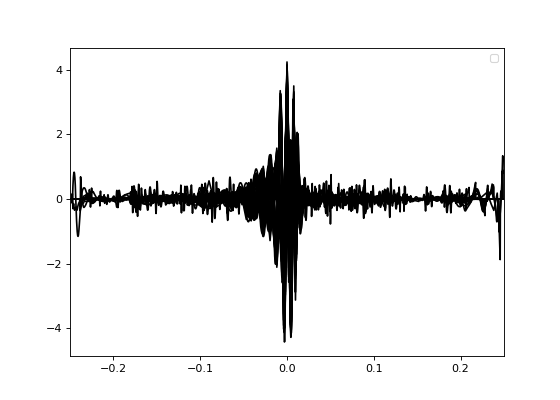

Ok


No handles with labels found to put in legend.


(<matplotlib.legend.Legend at 0x7f35623cb588>,)

In [295]:
plt.figure(figsize=(7,5))
i_fi=0
wdf_window = 0.25
from_zero=True

for fi in cbc_directories_fixed_SNR[0:5]:
    file_h5 = fi+'/cbc_20h_fixedSNR_white.h5'
    with h5py.File(file_h5, 'r') as fih5:
        hw_fi = np.array(fih5['strain_white'])
        if from_zero==True:
            t_fi = np.arange(0, len(hw_fi)/fs, 1/fs)
        else:
            t_fi = 450 + np.arange(0, len(hw_fi)/fs, 1/fs)+i_fi*sec_per_file
        if i_fi<1:
            print('Ok')
      #      plt.plot(t_fi, hw_fi/np.std(hw_fi), label='WDF whitened strain')
        i_fi+=1
#trig_signals = trig_signals.reset_index()
#del trig_signals['index']
N_sig_rec=100
rec_wv_pad_all=np.zeros((100,2048))
ccc=0
for tr in trig_signals.index[2:2+N_sig_rec]:  # [2:3]
#    print(tr)
    rec_wv = trig_signals.iloc[tr][-1024:]
    trig_gps = trig_signals.iloc[tr][0]
    custom_gps = find_nearest(injection_gps, trig_gps) + 0.6075
    peak_time=np.argmax(np.array(rec_wv))/fs
    np.arange(0,1024)/fs-peak_time
    left_pad = int((0.25-peak_time)*fs)
    right_pad = int(peak_time*fs)
    if abs(peak_time)<0.26:
        rec_wv = np.pad(rec_wv, (left_pad,right_pad), 'constant')
        rec_wv_pad_all[ccc,:] = rec_wv
        plt.plot(np.arange(-1024,1024)/fs,rec_wv/np.std(hw_fi), color='black')
    ccc+=1
        #plt.plot(np.arange(0,1024)/fs-peak_time,rec_wv/np.std(hw_fi), color='black')
   # plt.plot(custom_gps+np.arange(0,1024)/fs,rec_wv/np.std(hw_fi), label='WDF reconstruction', color='black')
#plt.plot(np.arange(550,551,1/fs),injection_wv[0], label='injection', color='black')
#plt.xlim(550.7,550.85), 
plt.xlim(-0.25,0.25)
plt.legend(), #plt.ylim(-1e-20, 1e-20),


In [296]:
rec_wv_pad_all.shape

(100, 2048)

<IPython.core.display.Javascript object>


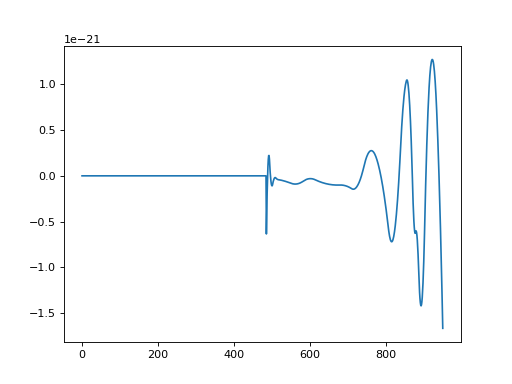

(<Figure size 640x480 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7f355ad38198>])

In [297]:
plt.figure(),plt.plot(rec_wv_pad_all[1,50:1000])

<IPython.core.display.Javascript object>


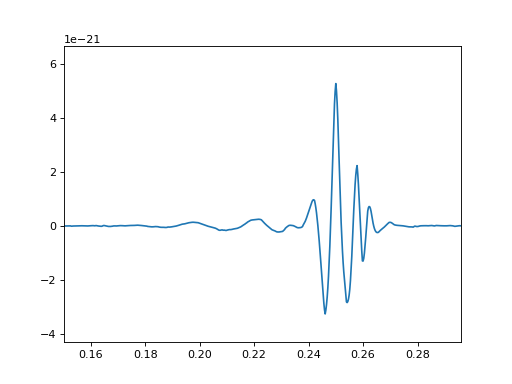

(<Figure size 640x480 with 1 Axes>,
 (-1e-20, 1e-20))

In [299]:
plt.figure(),plt.plot(np.arange(0,2048)/fs,np.mean(rec_wv_pad_all, axis=0)), plt.ylim(-1e-20,1e-20)

In [310]:
time_plot = np.arange(0,2048)/fs
ave_plot = np.mean(rec_wv_pad_all, axis=0)
std_plot = np.std(rec_wv_pad_all, axis=0)
#h_first = df2.loc['data_450_original']

sigma_1p =std_plot+ave_plot
sigma_1m =ave_plot-std_plot
sigma_2p =std_plot*2+ave_plot
sigma_2m =ave_plot-std_plot*2
sigma_3p =std_plot*3+ave_plot
sigma_3m =ave_plot-std_plot*3

plt.figure(figsize=(10,6))

#plt.plot(np.arange(5,6,1/4096)-0.0045,template,'red',label ="template")
#plt.plot(np.arange(5,6,1/4096),template,'red',label ="template")
plt.plot(time_plot,ave_plot,'black',label='mean')
#plt.xlim (5,6)
#plt.xlim (5.40,5.82)
plt.plot(time_plot,sigma_1p,color='gray',label='1_sigma')
plt.plot(time_plot,sigma_1m,color='gray')

plt.plot(time_plot,sigma_2p,color='darkgray',label='2_sigma')
plt.plot(time_plot,sigma_2m,color='darkgray')

plt.plot(time_plot,sigma_3p,color='lightgray',label='3_sigma')
plt.plot(time_plot,sigma_3m,color='lightgray')

plt.fill_between(time_plot,sigma_3m,sigma_3p,color='lightgray')
plt.fill_between(time_plot,sigma_2m,sigma_2p,color='darkgray')
plt.fill_between(time_plot,sigma_1m,sigma_1p,color='gray')


plt.legend(prop={'size':20})
plt.xlabel('Time[s]',fontsize =25)
plt.ylabel('Magnitude of whitened reconstructed waveform',fontsize =25)
plt.title('whitened reconstructed waveform',fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim (0,0.5)
plt.show()
#plt.tight_layout(pad=0.1)

<IPython.core.display.Javascript object>

In [153]:
rec_wv_pad_all.shape

AttributeError: 'tuple' object has no attribute 'shape'

<IPython.core.display.Javascript object>


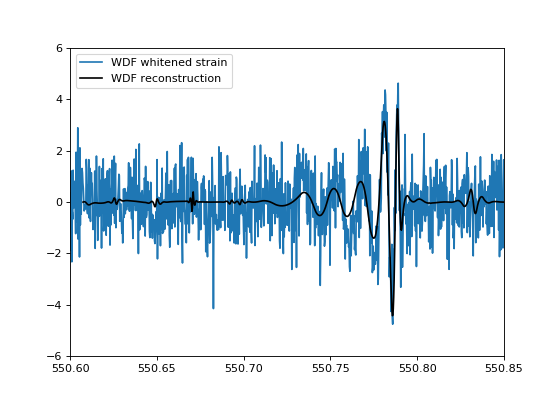

Ok


(<matplotlib.legend.Legend at 0x7f367cf3a0f0>, (-6, 6))

In [259]:
plt.figure(figsize=(7,5))
i_fi=0
wdf_window = 0.25
from_zero=False

for fi in cbc_directories_fixed_SNR[0:1]:
    file_h5 = fi+'/cbc_20h_fixedSNR_white.h5'
    with h5py.File(file_h5, 'r') as fih5:
        hw_fi = np.array(fih5['strain_white'])
        if from_zero==True:
            t_fi = np.arange(0, len(hw_fi)/fs, 1/fs)
        else:
            t_fi = 450 + np.arange(0, len(hw_fi)/fs, 1/fs)+i_fi*sec_per_file
            fii = np.where(t_fi>=min(times_norm))
            hw_fii = hw_fi[fii]
            t_fii = t_fi[fii]
            fiii = np.where(t_fii<=max(times_norm)+1/fs)
            t_fiii = t_fii[fiii]
            hw_fiii = hw_fii[fiii]/np.std(hw_fi)
        if i_fi<1:
            print('Ok')
            plt.plot(t_fi, hw_fi/np.std(hw_fi), label='WDF whitened strain')
        i_fi+=1
#trig_signals = trig_signals.reset_index()
#del trig_signals['index']
N_sig_rec=1
rec_wv_pad_all=np.zeros((100,2048))
ccc=0
for tr in trig_signals.index[2:2+N_sig_rec]:  # [2:3]
#    print(tr)
    rec_wv = trig_signals.iloc[tr][-1024:]
    trig_gps = trig_signals.iloc[tr][0]
    custom_gps = find_nearest(injection_gps, trig_gps) + 0.6075
    peak_time=np.argmax(np.array(rec_wv))/fs
    np.arange(0,1024)/fs-peak_time
    left_pad = int((0.25-peak_time)*fs)
    right_pad = int(peak_time*fs)
    if abs(peak_time)<0.26:
        ccc+=1
        #plt.plot(np.arange(0,1024)/fs-peak_time,rec_wv/np.std(hw_fi), color='black')
        rec_wv_norm=rec_wv/np.std(hw_fi)
        times_norm=custom_gps+np.arange(0,1024)/fs
        plt.plot(times_norm,rec_wv_norm, label='WDF reconstruction', color='black')
#plt.plot(np.arange(550,551,1/fs),injection_wv[0], label='injection', color='black')
plt.xlim(550.6,550.85), 
#plt.xlim(-0.25,0.25)
plt.legend(), plt.ylim(-6, 6),

In [239]:
len(t_fii)

14329415

In [266]:
plt.figure(), plt.plot(np.squeeze(times_norm),hw_fiii), plt.plot(times_norm, rec_wv_norm)

<IPython.core.display.Javascript object>

(<Figure size 640x480 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7f367ca16be0>])

In [236]:
np.shape(fiii)

(1, 1024)

In [192]:
fii = np.where(t_fi>=min(times_norm))
t_fii = t_fi[fii]
fii = np.where(t_fii<=max(times_norm))
t_fi

array([[  413113,   413114,   413115, ..., 14742525, 14742526, 14742527]])

In [258]:
t_fiii 

(array([   0,    1,    2, ..., 1021, 1022, 1023]),)

In [186]:
t_fi

array([ 450.        ,  450.00024414,  450.00048828, ..., 4048.99926758,
       4048.99951172, 4048.99975586])

In [182]:
np.logical_and(np.where(t_fi>min(times_norm)), np.where(t_fi<max(times_norm)))

ValueError: operands could not be broadcast together with shapes (1,14329415) (1,413112) 

In [246]:
np.shape(t_fiii), np.shape(hw_fiii), np.shape(times_norm), np.shape(rec_wv_norm)

((1, 1024), (1024,), (1024,), (1024,))

<IPython.core.display.Javascript object>


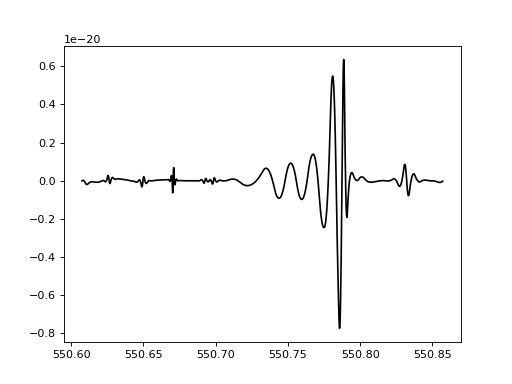

In [272]:
plt.figure(), plt.plot(custom_gps+np.arange(0,1024)/fs,rec_wv, label='WDF reconstruction', color='black')
rec_t_yanyan = custom_gps+np.arange(0,1024)/fs
rec_h_yanyan = rec_wv.values


columns1 = ["time", "hw", "h_rec_wv"]
data1 = np.column_stack((times_norm, hw_fiii, rec_wv_norm))
#data1 = np.column_stack((np.squeeze(np.array(t_fiii)),hw_fiii, times_norm, rec_wv_norm))
data1_yanyan = pd.DataFrame(data=data1, columns=columns1)
data1_yanyan.to_csv('/users/iess/WDF_vs_cWB/rec_wdf_550s_fixedSNR_norm.csv', index=False)
#columns1 = ["time", "h_reconstructed"]
#data1 = np.column_stack((rec_t_yanyan, rec_h_yanyan))
#data1_yanyan = pd.DataFrame(data=data1, columns=columns1)
#data1_yanyan.to_csv('/users/iess/WDF_vs_cWB/rec_wdf_550s_fixedSNR.csv', index=False)

In [252]:
t_fiii/fs

(array([   0,    1,    2, ..., 1021, 1022, 1023]),)

In [273]:
pd.read_csv('/users/iess/WDF_vs_cWB/rec_wdf_550s_fixedSNR_norm.csv')

time        hw  h_rec_wv
0     550.607500  0.529980 -0.005105
1     550.607744  0.060295  0.004477
2     550.607988 -0.348023  0.010050
3     550.608232 -0.296091  0.011615
4     550.608477 -0.115741  0.009172
...          ...       ...       ...
1019  550.856279  1.229056 -0.039651
1020  550.856523 -1.086017 -0.034524
1021  550.856768 -0.744122 -0.028506
1022  550.857012  0.533931 -0.021596
1023  550.857256  1.353063 -0.013796

[1024 rows x 3 columns]

In [ ]:
for tr in trig_signals.index:
#    print(tr)
    rec_wv = trig_signals.iloc[tr][-1024:]correlation = signal.correlate(x, y, mode="full")
    
    lags = signal.correlation_lags(x.size, y.size, mode="full")
    lag = lags[np.argmax(correlation)]

In [276]:
plt.figure(figsize=(10,20))
cc=0
for tr in trig_signals.index[0:20]:
    cc+=1
#    print(tr)
    rec_wv = trig_signals.iloc[tr][-1024:]
    trig_gps = trig_signals.iloc[tr][0]
#    custom_gps = find_nearest(injection_gps, trig_gps) + 0.66
    plt.subplot(20,1,cc),plt.plot(np.arange(0,1024)/fs,rec_wv) 


<IPython.core.display.Javascript object>

In [237]:
trig_signals

gps        snr     snrMax        freq  freqMax  duration  \
0      350.000000  27.217913  31.896872   88.000000     92.0  0.002197   
15     450.748535  14.891807  26.841199   76.000000     80.0  0.008545   
25     550.748535  17.308247  33.007449   72.000000     76.0  0.008789   
32     650.748535  13.728475  30.471713   96.000000    100.0  0.008545   
40     750.748535  13.692939  33.606545   92.000000     96.0  0.013184   
..            ...        ...        ...         ...      ...       ...   
294  71850.748535  13.831220  30.115443  142.666667    152.0  0.008057   
298  71950.748535  15.562973  31.474471  128.000000    132.0  0.008301   
305  72050.748535  16.135225  27.057146  112.000000    116.0  0.008545   
309  72150.748535  12.994448  29.922541   88.000000     92.0  0.002197   
316  72250.748535  12.076480  23.258085   84.000000     88.0  0.013428   

            wave           rw0           rw1           rw2  ...        rw1014  \
0    BsplineC309 -1.010439e-20 -1.465182e-20 -1.767327e-20  ... -1.481214e-22   
15   BsplineC309  6.208933e-23  4.453852e-23  2.764165e-23  ...  1.074884e-22   
25   BsplineC309 -8.918840e-24  7.820878e-24  1.755773e-23  ... -9.071238e-23   
32   BsplineC309 -6.341007e-22 -3.906532e-22 -1.875936e-22  ... -2.924476e-23   
40   BsplineC309 -4.124858e-22 -4.816569e-22 -5.293471e-22  ...  1.259363e-23   
..           ...           ...           ...           ...  ...           ...   
294  BsplineC309  1.766122e-22  1.806171e-22  1.843907e-22  ...  1.384667e-22   
298  BsplineC309 -5.513702e-23 -5.479927e-23 -5.455844e-23  ... -1.916700e-23   
305  BsplineC309 -1.546034e-21 -9.858705e-22 -5.091277e-22  ...  6.219037e-21   
309  BsplineC309  1.285227e-23  1.255480e-23  1.226002e-23  ...  1.520983e-23   
316  BsplineC309 -2.285592e-23 -2.066482e-23 -1.856058e-23  ... -2.762688e-23   

           rw1015        rw1016        rw1017        rw1018        rw1019  \
0    1.784034e-22  5.712960e-22  1.030556e-21  1.062333e-21  6.666258e-22   
15   1.135938e-22  1.173336e-22  1.187077e-22  1.177162e-22  1.143591e-22   
25  -8.953696e-23 -8.680511e-23 -8.251683e-23 -7.667212e-23 -6.927098e-23   
32   1.333977e-22  3.364116e-22  5.797969e-22  6.408267e-22  5.195010e-22   
40  -8.099014e-24 -3.363950e-23 -6.402783e-23 -9.926401e-23 -1.393480e-22   
..            ...           ...           ...           ...           ...   
294  1.421255e-22  1.458189e-22  1.495470e-22  1.533096e-22  1.571069e-22   
298 -2.598334e-23 -3.208428e-23 -3.746980e-23 -4.213992e-23 -4.609462e-23   
305  5.962121e-21  5.348191e-21  4.377248e-21  3.317347e-21  2.168487e-21   
309  1.502457e-23  1.482809e-23  1.462039e-23  1.440146e-23  1.417132e-23   
316 -2.855215e-23 -2.916578e-23 -2.946778e-23 -2.945814e-23 -2.913686e-23   

           rw1020        rw1021        rw1022        rw1023  
0   -1.565652e-22 -1.407240e-21 -3.482102e-21 -6.381153e-21  
15   1.086364e-22  1.005480e-22  9.009409e-23  7.727451e-23  
25  -6.031341e-23 -4.979941e-23 -3.772899e-23 -2.410213e-23  
32   2.158198e-22 -2.702169e-22 -5.738826e-22 -6.951772e-22  
40  -1.842799e-22 -2.340596e-22 -2.886872e-22 -3.481626e-22  
..            ...           ...           ...           ...  
294  1.609387e-22  1.648052e-22  1.687063e-22  1.726419e-22  
298 -4.933392e-23 -5.185781e-23 -5.366629e-23 -5.475936e-23  
305  9.306671e-22 -3.961113e-22 -1.251154e-21 -1.634462e-21  
309  1.392995e-23  1.367736e-23  1.341355e-23  1.313852e-23  
316 -2.850394e-23 -2.755939e-23 -2.630320e-23 -2.473538e-23  

[742 rows x 1031 columns]

In [216]:
trig_signals = triggers_fix_total[triggers_fix_total['snr']>8]
for inj_t in injection_gps[0:5]:
    for i in range(triggers_fix_total.shape[0]):
        trig_gps = triggers_fix_total.iloc[i]['gps']
        dt_from_inj = np.abs(inj_t-trig_gps)
        if dt_from_inj<1:
            print(trig_gps)
            rec_wv = triggers_fix_total.iloc[i][-1024:]
          #  plt.plot(np.arange(trig_gps, trig_gps+len(rec_wv)/fs, 1/fs))

450.74853515625
550.74853515625
650.74853515625
750.74853515625
850.74853515625


In [185]:
triggers_fix_total.head(50)

gps        snr     snrMax        freq  freqMax  duration  \
0   350.000000  27.217913  31.896872   88.000000     92.0  0.002197   
1   353.748535   2.163821  27.658481   40.000000     44.0  0.069580   
2   374.249512   2.018754  32.489318   20.000000     24.0  0.056396   
3   374.748535   2.189370  26.213324   72.000000     76.0  0.075684   
4   381.000000   2.175142  27.788167  138.666667    148.0  0.247803   
5   387.499023   2.035024  27.527637   78.666667    216.0  0.042725   
6   391.249512   2.237244  28.871964  218.666667    240.0  0.017822   
7   392.748535   2.146211  29.947106   36.000000     72.0  0.076416   
8   394.000000   2.096674  29.175939  158.666667    168.0  0.047852   
9   396.249512   2.074164  21.230561    8.000000     12.0  0.007324   
10  399.748535   2.064315  24.223734    8.000000     12.0  0.178223   
11  400.249512   2.608974  33.995846  160.000000    164.0  0.007080   
12  414.748535   2.462675  29.757820  145.333333    152.0  0.082275   
13  420.249512   2.391727  29.328872   50.666667    140.0  0.122070   
14  426.499023   2.020604  30.612428  144.000000    160.0  0.063477   
15  450.748535  14.891807  26.841199   76.000000     80.0  0.008545   
16  451.000000   2.228938  32.286355   96.000000    276.0  0.189209   
17  457.000000   2.842927  28.356396   52.000000    144.0  0.098633   
18  460.249512   2.002029  31.851652   93.333333    140.0  0.156250   
19  463.000000   2.053273  28.735528  133.333333    144.0  0.037842   
20  471.000000   2.694274  25.466943   68.000000     72.0  0.002197   
21  477.249512   2.578818  30.184216  152.000000    164.0  0.114014   
22  478.748535   2.242538  28.189820   96.000000    100.0  0.156738   
23  507.499023   2.043515  37.281941  294.666667    312.0  0.019531   
24  548.249512   2.122935  27.992319   56.000000     84.0  0.002197   
25  550.748535  17.308247  33.007449   72.000000     76.0  0.008789   
26  568.249512   2.743180  36.778832  361.333333    368.0  0.095947   
27  585.499023   2.245043  24.078489    8.000000     12.0  0.134033   
28  593.249512   2.099638  34.636954  101.333333    292.0  0.068848   
29  612.000000   2.004559  33.062540  140.000000    152.0  0.182129   
30  619.249512   2.379760  26.974388    8.000000     12.0  0.082275   
31  628.249512   2.193026  24.750617   48.000000     52.0  0.002197   
32  650.748535  13.728475  30.471713   96.000000    100.0  0.008545   
33  652.499023   2.094547  36.773947   20.000000     24.0  0.004150   
34  655.000000   2.245679  33.257467  108.000000    312.0  0.028809   
35  661.000000   2.148556  35.743122   74.666667     80.0  0.152832   
36  665.748535   2.326432  28.415981    8.000000     12.0  0.041016   
37  688.249512   2.187537  33.371462  172.000000    176.0  0.219238   
38  727.000000   2.001497  25.781385   72.000000     76.0  0.002197   
39  748.748535   2.318395  38.348274  341.333333    372.0  0.130371   
40  750.748535  13.692939  33.606545   92.000000     96.0  0.013184   
41  771.748535   2.060685  33.065716   48.000000     72.0  0.204834   
42  792.000000   2.012416  36.754934   48.000000     52.0  0.098877   
43  816.499023   2.066763  29.396770   10.666667     20.0  0.127930   
44  827.000000   2.764069  30.241017   29.333333     76.0  0.002197   
45  850.748535   3.419668  21.490283   52.000000     56.0  0.002197   
46  851.000000  12.601624  28.095394  100.000000    104.0  0.008545   
47  910.499023   2.182244  31.109282  310.666667    332.0  0.126709   
48  923.748535   2.098486  33.975772  289.333333    308.0  0.039795   
49  924.000000   3.005710  23.275085  132.000000    136.0  0.010254   

           wave           rw0           rw1           rw2  ...        rw1014  \
0   BsplineC309 -1.010439e-20 -1.465182e-20 -1.767327e-20  ... -1.481214e-22   
1   BsplineC309 -1.305713e-23 -1.355926e-23 -1.404967e-23  ... -2.641033e-23   
2   BsplineC309 -3.459307e-23 -3.498542e-23 -3.537210e-23  ... -3.157913e-23   
3   BsplineC309 -2.100968e-23 -1.805138e-23 -1.529413e-23  ...  1.514

In [188]:
len(injection_wv), injection_wv[23]

(719,
 array([ 5.3674666e-27,  2.0374548e-26,  5.2388092e-26, ...,
         2.8732983e-28, -2.3040386e-28,  0.0000000e+00], dtype=float32))

<IPython.core.display.Javascript object>


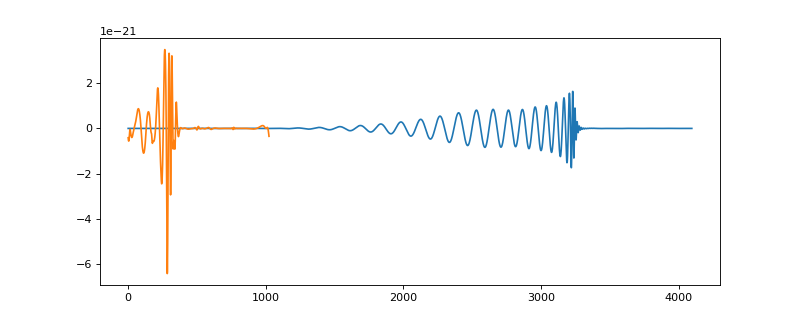

In [193]:
plt.figure(figsize=(10,4)), #plt.plot(np.arange(0,len(injection_wv))/fs,injection_wv[23])
plt.plot(injection_wv[23])
rec_wv = np.array(triggers_fix_total.iloc[40][-1024:])
plt.plot(rec_wv)

In [153]:
injection_gps

array([  450.,   550.,   650.,   750.,   850.,   950.,  1050.,  1150.,
        1250.,  1350.,  1450.,  1550.,  1650.,  1750.,  1850.,  1950.,
        2050.,  2150.,  2250.,  2350.,  2450.,  2550.,  2650.,  2750.,
        2850.,  2950.,  3050.,  3150.,  3250.,  3350.,  3450.,  3550.,
        3650.,  3750.,  3850.,  3950.,  4050.,  4150.,  4250.,  4350.,
        4450.,  4550.,  4650.,  4750.,  4850.,  4950.,  5050.,  5150.,
        5250.,  5350.,  5450.,  5550.,  5650.,  5750.,  5850.,  5950.,
        6050.,  6150.,  6250.,  6350.,  6450.,  6550.,  6650.,  6750.,
        6850.,  6950.,  7050.,  7150.,  7250.,  7350.,  7450.,  7550.,
        7650.,  7750.,  7850.,  7950.,  8050.,  8150.,  8250.,  8350.,
        8450.,  8550.,  8650.,  8750.,  8850.,  8950.,  9050.,  9150.,
        9250.,  9350.,  9450.,  9550.,  9650.,  9750.,  9850.,  9950.,
       10050., 10150., 10250., 10350., 10450., 10550., 10650., 10750.,
       10850., 10950., 11050., 11150., 11250., 11350., 11450., 11550.,
      

In [ ]:
df_coincident = pd.DataFrame([])
coincident_mf_SNR = []
coincident_WDF_SNR = []
jj= 0

for ind in range(meta.shape[0]):
    if 2>1:
#    try:
        inj_time = all_inj_time[ind]
       # inj_time = meta[ind][-1]
        if np.any(np.logical_and(df_reduced['gps']-window-max_shift < inj_time,  inj_time <= df_reduced['gps'])):
            count +=1
            if jj==0:
                df_coincident = df_reduced[(df_reduced['gps']-window-max_shift < inj_time) & 
                                            (inj_time <= df_reduced['gps'])]
                df_coincident_red = df_coincident[df_coincident['snr']==df_coincident['snr'].max()]
                coincident_WDF_SNR.append(np.sum(df_coincident['snr']))                
                coincident_mf_SNR.append(meta[ind][-1])
                jj+=1
            else:
                df_coinc_to_append = df_reduced[(df_reduced['gps']-window-max_shift < inj_time) & 
                                                               (inj_time <= df_reduced['gps'])]                
                df_coinc_to_append_red = df_coinc_to_append[df_coinc_to_append['snr']==df_coinc_to_append['snr'].max()]
                coincident_WDF_SNR.append(np.sum(df_coinc_to_append['snr']))                
                df_coincident_red = df_coincident_red.append(df_coinc_to_append_red)
                coincident_mf_SNR.append(meta[ind][-1])
                jj+=1
         #   df_reduced = df_reduced[df_reduced['gps']]
        else: 
            missed[ind] = ind 
#            missed_snr = np.append(missed_snr, snr_array[ind])
            missed_snr = np.append(missed_snr, meta[ind][-1])
    else:
#   except:
        print('Error.')
    

In [138]:
fixed_SNR_path = '/data/dev/ml/cwb_vs_wdf/data/cbc/splitted/cbc_'
i_file_f = 0
fs = 4096
plt.figure(figsize=(10,4))
for i_file_f in range(2):
    with h5py.File(fixed_SNR_path+str(i_file_f)+'/cbc_20h_fixedSNR_white.h5', 'r') as f:
        print(list(f.keys()))
        print('File nr. ' +str(i_file_f))
        h_i = np.array(f['strain_white'])
        print(len(h_i))
        t_i = 350+3600*(i_file_f)+np.arange(0,len(h_i)/fs,1/fs)
        plt.plot(t_i, h_i)

<IPython.core.display.Javascript object>

['strain_white']
File nr. 0
14741504
['strain_white']
File nr. 1
14741504


In [54]:
14741504/fs

3599.0

In [73]:
ls /data/dev/ml/cwb_vs_wdf/data/

cbc/             cbc_uniformSNR_v2/                            new_cbc/
cbc_uniformSNR/  cbc_uniformSNRwhitening_parameters_strain_0/  no_dct/


In [56]:
ls /data/dev/ml/cwb_vs_wdf/data/cbc/splitted/cbc_0/whitening_parameters/WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR2.csv

ARcoeff-AR4000-fs4096-strain.txt
fileParametersUsed.json
LVcoeff-AR4000-fs4096-strain.txt
WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR2.csv


In [43]:
plt.figure(), plt.plot(t_i, h_i)

<IPython.core.display.Javascript object>

(<Figure size 640x480 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7f1bd3b1c6d8>])

In [58]:
snr_25_triggers = pd.read_csv('/data/dev/ml/cwb_vs_wdf/data/cbc/splitted/cbc_0/whitening_parameters/WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR2.csv')

In [91]:
gpss = snr_25_triggers['gps']

In [104]:
snr_25_triggers.head(50)

gps        snr     snrMax        freq  freqMax  duration  \
0     0.000000  27.217913  31.896872   88.000000     92.0  0.002197   
1     3.748535   2.163821  27.658481   40.000000     44.0  0.069580   
2    24.249512   2.018754  32.489318   20.000000     24.0  0.056396   
3    24.748535   2.189370  26.213324   72.000000     76.0  0.075684   
4    31.000000   2.175142  27.788167  138.666667    148.0  0.247803   
5    37.499023   2.035024  27.527637   78.666667    216.0  0.042725   
6    41.249512   2.237244  28.871964  218.666667    240.0  0.017822   
7    42.748535   2.146211  29.947106   36.000000     72.0  0.076416   
8    44.000000   2.096674  29.175939  158.666667    168.0  0.047852   
9    46.249512   2.074164  21.230561    8.000000     12.0  0.007324   
10   49.748535   2.064315  24.223734    8.000000     12.0  0.178223   
11   50.249512   2.608974  33.995846  160.000000    164.0  0.007080   
12   64.748535   2.462675  29.757820  145.333333    152.0  0.082275   
13   70.249512   2.391727  29.328872   50.666667    140.0  0.122070   
14   76.499023   2.020604  30.612428  144.000000    160.0  0.063477   
15  100.748535  14.891807  26.841199   76.000000     80.0  0.008545   
16  101.000000   2.228938  32.286355   96.000000    276.0  0.189209   
17  107.000000   2.842927  28.356396   52.000000    144.0  0.098633   
18  110.249512   2.002029  31.851652   93.333333    140.0  0.156250   
19  113.000000   2.053273  28.735528  133.333333    144.0  0.037842   
20  121.000000   2.694274  25.466943   68.000000     72.0  0.002197   
21  127.249512   2.578818  30.184216  152.000000    164.0  0.114014   
22  128.748535   2.242538  28.189820   96.000000    100.0  0.156738   
23  157.499023   2.043515  37.281941  294.666667    312.0  0.019531   
24  198.249512   2.122935  27.992319   56.000000     84.0  0.002197   
25  200.748535  17.308247  33.007449   72.000000     76.0  0.008789   
26  218.249512   2.743180  36.778832  361.333333    368.0  0.095947   
27  235.499023   2.245043  24.078489    8.000000     12.0  0.134033   
28  243.249512   2.099638  34.636954  101.333333    292.0  0.068848   
29  262.000000   2.004559  33.062540  140.000000    152.0  0.182129   
30  269.249512   2.379760  26.974388    8.000000     12.0  0.082275   
31  278.249512   2.193026  24.750617   48.000000     52.0  0.002197   
32  300.748535  13.728475  30.471713   96.000000    100.0  0.008545   
33  302.499023   2.094547  36.773947   20.000000     24.0  0.004150   
34  305.000000   2.245679  33.257467  108.000000    312.0  0.028809   
35  311.000000   2.148556  35.743122   74.666667     80.0  0.152832   
36  315.748535   2.326432  28.415981    8.000000     12.0  0.041016   
37  338.249512   2.187537  33.371462  172.000000    176.0  0.219238   
38  377.000000   2.001497  25.781385   72.000000     76.0  0.002197   
39  398.748535   2.318395  38.348274  341.333333    372.0  0.130371   
40  400.748535  13.692939  33.606545   92.000000     96.0  0.013184   
41  421.748535   2.060685  33.065716   48.000000     72.0  0.204834   
42  442.000000   2.012416  36.754934   48.000000     52.0  0.098877   
43  466.499023   2.066763  29.396770   10.666667     20.0  0.127930   
44  477.000000   2.764069  30.241017   29.333333     76.0  0.002197   
45  500.748535   3.419668  21.490283   52.000000     56.0  0.002197   
46  501.000000  12.601624  28.095394  100.000000    104.0  0.008545   
47  560.499023   2.182244  31.109282  310.666667    332.0  0.126709   
48  573.748535   2.098486  33.975772  289.333333    308.0  0.039795   
49  574.000000   3.005710  23.275085  132.000000    136.0  0.010254   

           wave           rw0           rw1           rw2  ...        rw1014  \
0   BsplineC309 -1.010439e-20 -1.465182e-20 -1.767327e-20  ... -1.481214e-22   
1   BsplineC309 -1.305713e-23 -1.355926e-23 -1.404967e-23  ... -2.641033e-23   
2   BsplineC309 -3.459307e-23 -3.498542e-23 -3.537210e-23  ... -3.157913e-23   
3   BsplineC309 -2.100968e-23 -1.805138e-23 -1.529413e-23  ...  1.514

In [109]:
wvf = np.array(snr_25_triggers.iloc[46][-1024:])

<IPython.core.display.Javascript object>


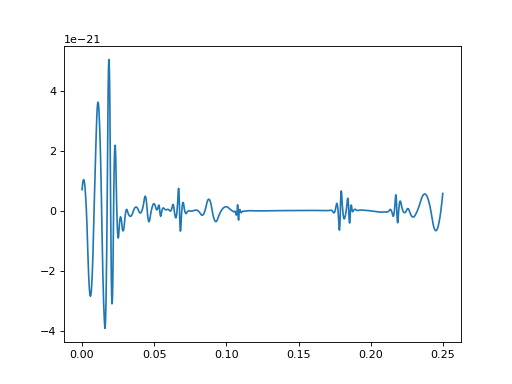

(<Figure size 640x480 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7f1b6d095b70>])

In [110]:
plt.figure(),plt.plot(np.arange(0,len(wvf),1)/fs, wvf)

In [112]:
296345601/14741504

20.102806402928763

M1, *M2, S1z, S2z, inclination, coal_phase, distance, R.A., dec, polarization, M_chirp, injection time, *matched filter SNR

In [96]:
metadata

<Closed HDF5 dataset>